# Breast Cancer Wisconsin Diagnostic
**Benign or Malignant Cancer Tumors**

### Classification Models

#### **Developed by** [**Parth Maniar** ](https://github.com/officialpm)  🖖

<img src="https://visitor-badge.laobi.icu/badge?page_id=officialpm.BreastCancerModels" alt="visitor badge"/>
<div>

<a href="mailto:officialparthmaniar@gmail.com">
  <img align="left" alt="Parth's LinkedIn" width="22px" src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/gmail.svg" />
</a>

<a href="https://twitter.com/parthcodes">
  <img align="left" alt="Parth | Twitter" width="22px" src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/twitter.svg" />
</a>
<a href="https://www.linkedin.com/in/parthdmaniar/">
  <img align="left" alt="Parth's LinkedIn" width="22px" src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/linkedin.svg" />
</a>
<a href="https://t.me/parthmaniar">
  <img align="left" alt="Parth's Telegram" width="22px" src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/telegram.svg" />
</a>


</div>
<br/>

---


# Downloading dataset from UCI
---
Dataset Link - https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data

--2020-11-11 13:58:10--  https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 124103 (121K) [application/x-httpd-php]
Saving to: ‘wdbc.data’

wdbc.data           100%[===================>] 121.19K  --.-KB/s    in 0.08s   

2020-11-11 13:58:10 (1.40 MB/s) - ‘wdbc.data’ saved [124103/124103]



In [2]:
import pandas as pd

In [3]:
headers = ["id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"]
data = pd.read_csv('wdbc.data', names=headers)

# Classification Models

## Importing Packages

In [4]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# !pip install tqdm
import time
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter("ignore")

## Preparing Data

In [5]:
# feature names as a list
col = data.columns  # .columns gives columns names in data 
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
# Y includes our labels and x includes our features
Y = data.diagnosis                          # M or B 
list = ['id','diagnosis']
X = data.drop(list,axis = 1 )
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# Function is used to convert text class to neumerical class
def Y_class(Y):
  if Y == 'B':
    return 0
  elif Y == 'M':
    return 1

#changing 
actual_value = Y
category = actual_value.map(Y_class) 
Y_class = category

In [8]:
# Split the data into train, validation and test
from sklearn.model_selection import train_test_split
X_t, X_test, Y_t, Y_test = train_test_split(X, Y_class, test_size=0.05, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_t, Y_t, test_size=0.05, random_state=42)

## Applyiing Models

### Logistic Regression

Logistic regression is used for classification problem, this algorithm will create a line or plane to separate the data of different classes.
the algoritham uses log loss as a loss function and l2 regularization as regularization parameter.

to get the plane or line equation algoritham uses weights corrospond to each feature. like if i have 2 feature in data. so my line equation will look like:

Y = 'w1 * X1 + w2 * X2 + w3'
here X1 and X2 are features and w1, w2 and w3 are wights corrosponding to each feature, which will decide while training the logistic regression model.

In [9]:
# hyperparaeter values for logistic regression
C_list = []
i = 0.0001
for count in range(25):
    C_list.append(i)
    i = round(i+0.001,4)

#### **When do you consider adding the “regularization parameter” to the model? and how it**
#### **will help to improve the model performance?**



Here I have used l2 as regularization parameter, regularization parameter is used to avoid overfitting and underfitting in Data. Because our loss function for any model is described as ;

loss function = loss+lambda*regularize parameter

here lambda is learning parameter, if we are giving very less value to lambda, it means that we are giving more importance to loss so if we are getting very low loss for the model, so there is a case that we are getting good accuracy at trainig time but less in test time. and

if we are giving very large value to lambda in that case we are not giving importance to loss means we are not giving importance to learning of the model.

to balance this situation we are using lambda as learning parameter in our loss function.



In [10]:
# function is used for training logistic regression model
def AUC_curve(X_train, Y_train, X_cv, Y_cv):
    auc_train = []
    auc_cv = []
    for C in C_list:
    #     Applying Logistic Regression with l2 regularization on trainng data for each C
        clf = LogisticRegression(C=C,penalty="l2")
        clf.fit(X_train, Y_train)
                # predict the response
        probs_train = clf.predict_proba(X_train)
        preds_train = probs_train[:,1]
        fpr_train, tpr_train, threshold_train = metrics.roc_curve(Y_train, preds_train)
        auc_train.append(metrics.auc(fpr_train, tpr_train))
    #     predicting probabilistic value from the cross validation data.
        probs_cv = clf.predict_proba(X_cv)
        preds_cv = probs_cv[:,1]
        fpr_cv, tpr_cv, threshold_cv = metrics.roc_curve(Y_cv, preds_cv)
        auc_cv.append(metrics.auc(fpr_cv, tpr_cv)) 
    
    df = pd.DataFrame({'Train_Accuracy': auc_train, 'CV_Accuracy': auc_cv},  index = C_list) 

    #   Ploting AUC curve for each value of C to find best which is neihter overfit nor underfit much.
    plt.plot(C_list,auc_train,label="Train Data")
    # for xy in zip(alpha, np.round(auc_train,2)):
    #         plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
    plt.plot(C_list,auc_cv,label="CV Data")
    for xy in zip(C_list, np.round(auc_cv,2)):
            plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

    plt.xlabel('C Value')
    plt.ylabel('AUC Data')
    plt.legend()
    plt.show()
    return df

Because the data is imbalanced so i have used AUC as my performance matrix

#### Learning Curve

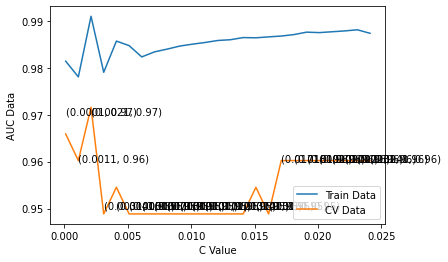

,Train_Accuracy,CV_Accuracy
0.0001,0.981408,0.965909
0.0011,0.978067,0.960227
0.0021,0.990989,0.971591
0.0031,0.979045,0.948864
0.0041,0.985693,0.954545
0.0051,0.984732,0.948864
0.0061,0.982320,0.948864
0.0071,0.983396,0.948864
0.0081,0.983982,0.948864
0.0091,0.984634,0.948864


In [11]:
# Applying logistic regression on each value of C to find best C.
AUC_curve(X_train, Y_train, X_val, Y_val)

To choose the best hyperparameter i used hyperparameter vs AUC performance graph.

Overfitting Case - for any C value if i am geeting good accuracy at train time but less in Validation time.

Underfitting Case - for any C value if i am not geeting good accuracy at train and Validation time.

Best Hyper Parameter - we will choose that C value for which i am getting good accuracy on train and test time.

In [12]:
def final_Model(C,X_train, Y_train, X_test, Y_test):
    clf = LogisticRegression(C=C,penalty="l2")
    clf.fit(X_train, Y_train)
    # getting probabilistic value from my model on Train data
    probs_train = clf.predict_proba(X_train)
    preds_train= probs_train[:,1]
    y_train_pred = clf.predict(X_train)
    fpr_train, tpr_train, threshold_train = metrics.roc_curve(Y_train, preds_train)
    auc_train = metrics.auc(fpr_train, tpr_train)

    # getting probabilistic and predicted value from my model on Train data
    probs_test = clf.predict_proba(X_test)
    y_pred = clf.predict(X_test)
    preds_test = probs_test[:,1]
    fpr_test, tpr_test, threshold_test = metrics.roc_curve(Y_test, preds_test)
    auc_test = metrics.auc(fpr_test, tpr_test)

    # Graph to show Accuracy percentage on train and test set data.
    plt.plot(fpr_train,tpr_train,label="AUC of Train Data"+str(np.round(auc_train,2)), color = 'green')
    plt.plot(fpr_test,tpr_test,label="AUC of Test Data"+str(np.round(auc_test,2)), color = 'red')
    plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
    plt.xlabel('Number of Neighbors K')
    plt.ylabel('AUC Data')
    plt.legend()
    plt.show()
    
    return clf, y_pred, y_train_pred

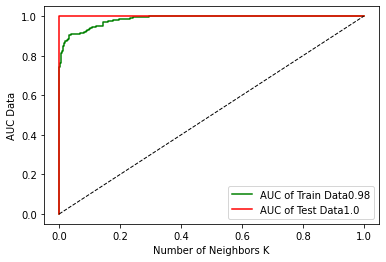

In [13]:
# For the value of C at 0.0091 data is not much overfit and underfit, so we are taking that as a C value for our LR model
clf, y_pred, y_train_pred = final_Model(0.0091,X_train, Y_train, X_test, Y_test)

**We are getting 99% AUC performance for training data and 99% AUC performance for test data for C value 0.0091.**

In [14]:
import itertools
# Plotting Confusion matrix to know How much data is correctly and incorrectly predicted by our model.

def plot_confusion_matrix(cm, classes=['Benign', 'Malignant'],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[314   9]
 [ 23 167]]
Normalized confusion matrix
[[0.97 0.03]
 [0.12 0.88]]


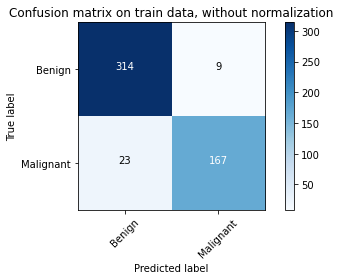

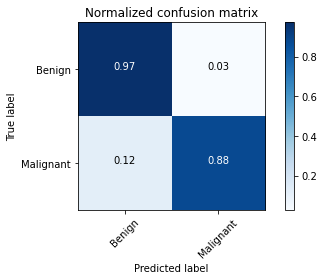

In [15]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_train, y_train_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      title='Confusion matrix on train data, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,  normalize=True,
                      title='Normalized confusion matrix')

plt.show()

**From the confusion matrix of Training Data, we can see that our model has classified 314 record correct for Benign out of 323 and 167 record correct for Malignant out of 190.**

Confusion matrix, without normalization
[[18  0]
 [ 1 10]]
Normalized confusion matrix
[[1.   0.  ]
 [0.09 0.91]]


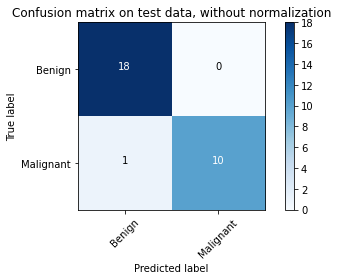

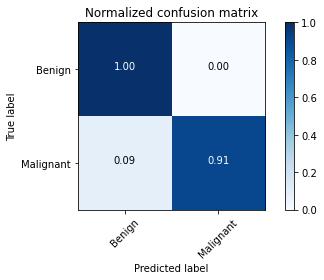

In [16]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      title='Confusion matrix on test data, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,  normalize=True,
                      title='Normalized confusion matrix')

plt.show()

**From the confusion matrix of Test Data, we can see that our model has classified 18 record correct for Benign out of 18 and 10 record correct for Malignant out of 11**

In [17]:
# This function will give weight of all the feature
def most_informative_feature_for_class(data, classifier):
    topn = sorted(zip(classifier.coef_[0], data.columns ), reverse=True)
    column_names = ["word", "coef"]
    df = pd.DataFrame(columns = column_names)
    row = 0
    for coe, name in topn:
        df.loc[row] = [name, coe]
        row+=1
    return df

Most Important Feature for class Logistic Regression : 


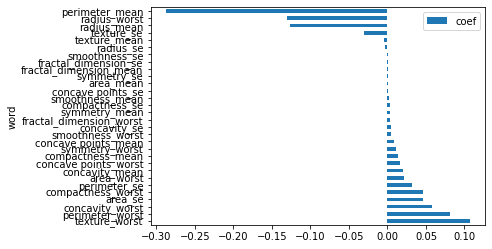

In [18]:
print("Most Important Feature for class Logistic Regression : ")
df = most_informative_feature_for_class(X,clf)
ax = df.plot.barh(x='word', y='coef')

 From the above plot we can identify which features are getting how much weight in our model. if feature is not getting any weights it means that feature is not useful for prediction. like here **smoothness_se** and **fractal_dimension_se** is not having any weights. So will remove these features and verify the accuracy of model

In [19]:
clf.coef_

array([[-1.26e-01, -4.81e-03, -2.88e-01,  7.15e-04,  2.02e-03,  1.36e-02,
         2.00e-02,  8.05e-03,  3.22e-03,  2.67e-04, -3.09e-03, -3.09e-02,
         3.21e-02,  4.60e-02,  2.30e-04,  2.92e-03,  4.21e-03,  1.15e-03,
         6.20e-04,  2.31e-04, -1.30e-01,  1.07e-01,  8.10e-02,  2.08e-02,
         4.29e-03,  4.55e-02,  5.77e-02,  1.65e-02,  1.16e-02,  3.61e-03]])

#### Removing feature which are having zero weights value.

In [20]:
drop_list = ['fractal_dimension_se', 'smoothness_se']
x_new = X.drop(drop_list,axis = 1 )        # do not modify x, we will use it later 
x_new.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,compactness_se,concavity_se,concave points_se,symmetry_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.04904,0.05373,0.01587,0.03003,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.01308,0.01860,0.01340,0.01389,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.04006,0.03832,0.02058,0.02250,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.07458,0.05661,0.01867,0.05963,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.02461,0.05688,0.01885,0.01756,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
from sklearn.model_selection import train_test_split
X_t_new, X_test_new, Y_t_new, Y_test_new = train_test_split(x_new, Y_class, test_size=0.05, random_state=42)
X_train_new, X_val_new, Y_train_new, Y_val_new = train_test_split(X_t_new, Y_t_new, test_size=0.05, random_state=42)

In [22]:
X_train_new.shape, Y_train_new.shape, X_val_new.shape, Y_val_new.shape

((513, 28), (513,), (27, 28), (27,))

#### Learning Curve

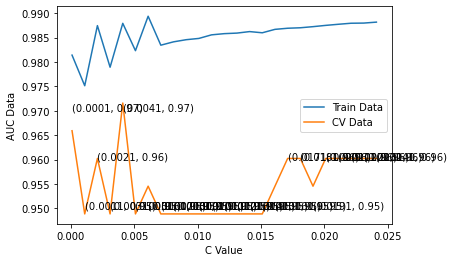

,Train_Accuracy,CV_Accuracy
0.0001,0.981408,0.965909
0.0011,0.975134,0.948864
0.0021,0.987453,0.960227
0.0031,0.978931,0.948864
0.0041,0.987926,0.971591
0.0051,0.982320,0.948864
0.0061,0.989376,0.954545
0.0071,0.983445,0.948864
0.0081,0.984129,0.948864
0.0091,0.984569,0.948864


In [23]:
# Applying logistic regression on each value of C to find best C.
AUC_curve(X_train_new, Y_train_new, X_val_new, Y_val_new)

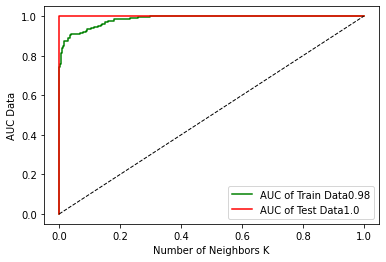

In [24]:
# For the value of C at 0.01 data is not much overfit and underfit, so we are taking that as a C value for our LR model
clf, y_pred, y_train_pred = final_Model(0.0091,X_train_new, Y_train_new, X_test_new, Y_test_new)

Confusion matrix, without normalization
[[314   9]
 [ 24 166]]
Normalized confusion matrix
[[0.97 0.03]
 [0.13 0.87]]


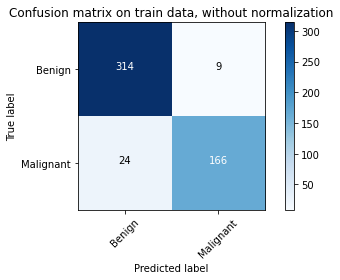

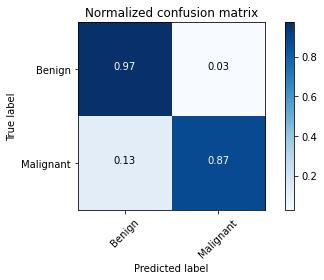

In [25]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_train_new, y_train_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      title='Confusion matrix on train data, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,  normalize=True,
                      title='Normalized confusion matrix')

plt.show()

**From the confusion matrix of Training Data, we can see that our model has classified 314 record correct for Benign out of 323 and 166 record correct for Malignant out of 190. So after removing 'fractal_dimension_se', 'smoothness_se' unimportant feature AUC performance of Malignant increased by 1.**

Confusion matrix, without normalization
[[18  0]
 [ 1 10]]
Normalized confusion matrix
[[1.   0.  ]
 [0.09 0.91]]


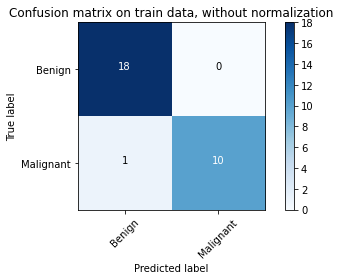

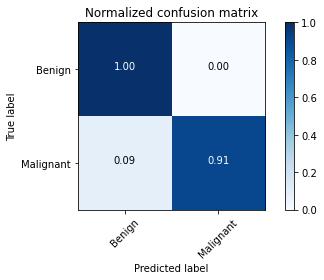

In [26]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test_new, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      title='Confusion matrix on train data, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,  normalize=True,
                      title='Normalized confusion matrix')

plt.show()

**So after removing 'fractal_dimension_se', 'smoothness_se' unimportant feature AUC performance of test data has not changed.**

Most Important Feature for class Logistic Regression : 


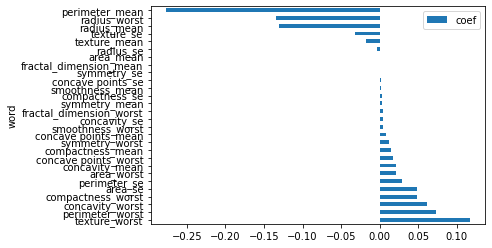

In [27]:
print("Most Important Feature for class Logistic Regression : ")
df = most_informative_feature_for_class(x_new,clf)
ax = df.plot.barh(x='word', y='coef')

**From the plot we can see that 'fractal_dimension_mean' has got weight value zero. so now ahead we will remove this feature from data and see what accuracy we will get.**

In [28]:
clf.coef_

array([[-1.30e-01, -1.84e-02, -2.77e-01, -2.10e-04,  2.28e-03,  1.47e-02,
         2.14e-02,  8.65e-03,  3.55e-03,  3.39e-04, -3.39e-03, -3.19e-02,
         2.95e-02,  4.83e-02,  3.12e-03,  4.50e-03,  1.23e-03,  6.64e-04,
        -1.35e-01,  1.17e-01,  7.29e-02,  2.15e-02,  4.74e-03,  4.86e-02,
         6.15e-02,  1.76e-02,  1.24e-02,  3.92e-03]])

**REMOVING 'fractal_dimension_mean' FEATURE**

In [29]:
drop_list = ['fractal_dimension_mean']
x_new_1 = x_new.drop(drop_list,axis = 1 )        # do not modify x, we will use it later 
x_new_1.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,texture_se,perimeter_se,area_se,compactness_se,concavity_se,concave points_se,symmetry_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,1.0950,0.9053,8.589,153.40,0.04904,0.05373,0.01587,0.03003,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.5435,0.7339,3.398,74.08,0.01308,0.01860,0.01340,0.01389,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.7456,0.7869,4.585,94.03,0.04006,0.03832,0.02058,0.02250,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.4956,1.1560,3.445,27.23,0.07458,0.05661,0.01867,0.05963,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.7572,0.7813,5.438,94.44,0.02461,0.05688,0.01885,0.01756,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [30]:
from sklearn.model_selection import train_test_split
X_t_new_1, X_test_new_1, Y_t_new_1, Y_test_new_1 = train_test_split(x_new_1, Y_class, test_size=0.05, random_state=42)
X_train_new_1, X_val_new_1, Y_train_new_1, Y_val_new_1 = train_test_split(X_t_new_1, Y_t_new_1, test_size=0.05, random_state=42)

In [31]:
X_train_new_1.shape, Y_train_new_1.shape, X_val_new_1.shape, Y_val_new_1.shape

((513, 27), (513,), (27, 27), (27,))

#### Learning Curve

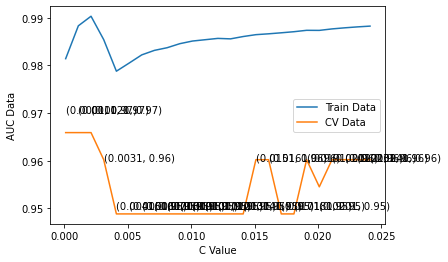

,Train_Accuracy,CV_Accuracy
0.0001,0.981408,0.965909
0.0011,0.988300,0.965909
0.0021,0.990305,0.965909
0.0031,0.985400,0.960227
0.0041,0.978784,0.948864
0.0051,0.980479,0.948864
0.0061,0.982206,0.948864
0.0071,0.983151,0.948864
0.0081,0.983705,0.948864
0.0091,0.984553,0.948864


In [32]:
# Applying logistic regression on each value of C to find best C.
AUC_curve(X_train_new_1, Y_train_new_1, X_val_new_1, Y_val_new_1)

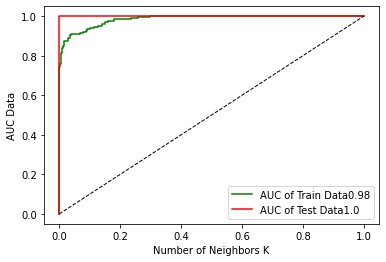

In [33]:
# For the value of C at 0.01 data is not much overfit and underfit, so we are taking that as a C value for our LR model
clf, y_pred, y_train_pred = final_Model(0.0091,X_train_new_1, Y_train_new_1, X_test_new_1, Y_test_new_1)

Confusion matrix, without normalization
[[314   9]
 [ 24 166]]
Normalized confusion matrix
[[0.97 0.03]
 [0.13 0.87]]


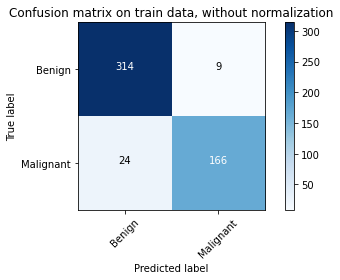

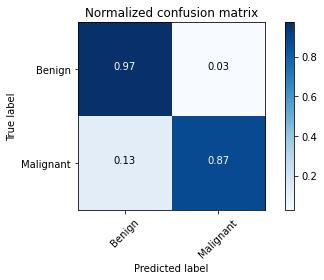

In [34]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_train_new_1, y_train_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      title='Confusion matrix on train data, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,  normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Confusion matrix, without normalization
[[18  0]
 [ 1 10]]
Normalized confusion matrix
[[1.   0.  ]
 [0.09 0.91]]


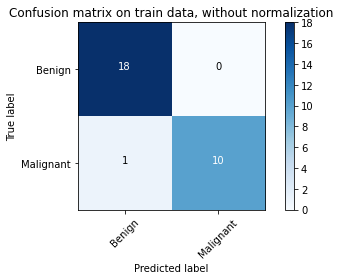

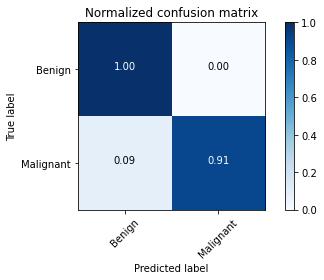

In [35]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test_new_1, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      title='Confusion matrix on train data, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,  normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Most Important Feature for class Logistic Regression : 


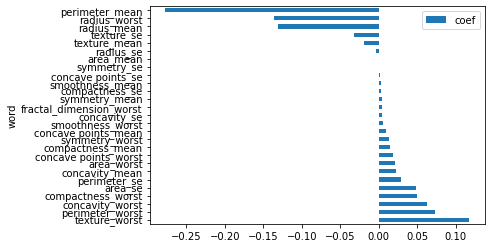

In [36]:
print("Most Important Feature for class Logistic Regression : ")
df = most_informative_feature_for_class(x_new_1,clf)
ax = df.plot.barh(x='word', y='coef')

In [37]:
clf.coef_

array([[-1.31e-01, -1.86e-02, -2.78e-01, -1.88e-04,  2.33e-03,  1.49e-02,
         2.17e-02,  8.79e-03,  3.63e-03, -3.45e-03, -3.27e-02,  2.95e-02,
         4.88e-02,  3.16e-03,  4.57e-03,  1.25e-03,  6.77e-04, -1.37e-01,
         1.18e-01,  7.33e-02,  2.15e-02,  4.83e-03,  4.93e-02,  6.24e-02,
         1.79e-02,  1.27e-02,  3.99e-03]])

**From the confusion Matrix we can see that AUC performance for Maliganant Cancer is decreased by 2, but it is not effecting our test result.**

**But at the end we need to select best model, so we will not consider this model for predicting the result.**

### SVM

Support vector machine is used to solve Supervised Machine Learning Problem(Classification). In support Vector Machine the algoritham will try to predict the best plane or line on the basis of support vectors of different classes.

this algoritham uses hinge loss as a loss function and l2 as regularization parameter.

In [38]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV

In [39]:
def AUC_svm_curve(X_train, Y_train, X_cv, Y_cv):
    auc_train = []
    auc_cv = []
    for alpha in C_list:
    #     Applying Logistic Regression with l1 regularization on trainng data for each C
        clf = SGDClassifier(alpha=alpha,penalty="l2", loss="hinge")
        clf.fit(X_train, Y_train)
                # predict the response
        preds_train = clf.predict(X_train)
#       SGDClassifier using sigmoid calibration
        clf_sigmoid = CalibratedClassifierCV(clf,cv = 4, method = "isotonic")
        clf_sigmoid.fit(X_train, Y_train)
        
#       predicting probabilistic value from the Train data.
        prob_train_sigmoid = clf_sigmoid.predict_proba(X_train)[:,1]
        fpr_train, tpr_train, threshold_train = metrics.roc_curve(Y_train, prob_train_sigmoid)
        auc_train.append(metrics.auc(fpr_train, tpr_train))
        
        
#       predicting probabilistic value from the cross validation data.
        preds_cv = clf.predict(X_cv)
        prob_cv_sigmoid = clf_sigmoid.predict_proba(X_cv)[:,1]
        fpr_cv, tpr_cv, threshold_cv = metrics.roc_curve(Y_cv, prob_cv_sigmoid)
        auc_cv.append(metrics.auc(fpr_cv, tpr_cv)) 

    #   Ploting AUC curve for each value of C to find best which is neihter overfit nor underfit much.
    # alpha_log = [round(log10(x),2) for x in r]
    df = pd.DataFrame({'Train_Accuracy': auc_train, 'CV_Accuracy': auc_cv},  index = C_list) 

    # Plotting the graph between alpha and its AUC value to find best alpha for our model.    
    plt.plot(C_list,auc_train,label="Train Data")
    # for xy in zip(alpha, np.round(auc_train,2)):
    #         plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
    plt.plot(C_list,auc_cv,label="CV Data")
    for xy in zip(C_list, np.round(auc_cv,2)):
            plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

    plt.xlabel('Value of Alpha')
    plt.ylabel('AUC Data')
    plt.legend()
    plt.show()
    return df

#### Learning Curve

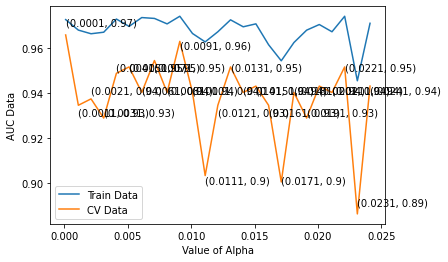

,Train_Accuracy,CV_Accuracy
0.0001,0.972739,0.965909
0.0011,0.968071,0.934659
0.0021,0.966449,0.937500
0.0031,0.967134,0.928977
0.0041,0.972984,0.948864
0.0051,0.969716,0.951705
0.0061,0.973643,0.940341
0.0071,0.973261,0.954545
0.0081,0.970833,0.940341
0.0091,0.974230,0.963068


In [40]:
# Applying logistic regression on each value of C to find best C.
AUC_svm_curve(X_train, Y_train, X_val, Y_val)

In [41]:
def final_Model(C,X_train, Y_train, X_test, Y_test):
    clf = SGDClassifier(alpha=C,penalty="l2", loss="hinge")
    clf.fit(X_train, Y_train)
            # predict the response
    preds_train = clf.predict(X_train)
#       SGDClassifier using sigmoid calibration
    clf_sigmoid = CalibratedClassifierCV(clf,cv = 4, method = "isotonic")
    clf_sigmoid.fit(X_train, Y_train)

#       predicting probabilistic value from the Train data.
    prob_train_sigmoid = clf_sigmoid.predict_proba(X_train)[:,1]
    fpr_train, tpr_train, threshold_train = metrics.roc_curve(Y_train, prob_train_sigmoid)
    auc_train = metrics.auc(fpr_train, tpr_train)


#       predicting probabilistic value from the cross validation data.
    preds_test = clf.predict(X_test)
    prob_test_sigmoid = clf_sigmoid.predict_proba(X_test)[:,1]
    fpr_test, tpr_test, threshold_test = metrics.roc_curve(Y_test, prob_test_sigmoid)
    auc_test = metrics.auc(fpr_test, tpr_test)

    # Graph to show Accuracy percentage on train and test set data.
    plt.plot(fpr_train,tpr_train,label="AUC of Train Data"+str(np.round(auc_train,2)), color = 'green')
    plt.plot(fpr_test,tpr_test,label="AUC of Test Data"+str(np.round(auc_test,2)), color = 'red')
    plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
    plt.xlabel('Number of Neighbors K')
    plt.ylabel('AUC Data')
    plt.legend()
    plt.show()
    
    return clf, preds_test, preds_train

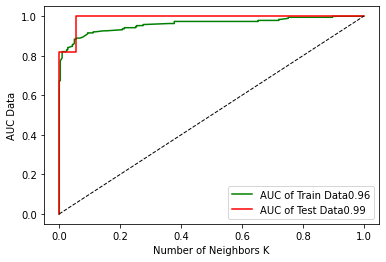

In [42]:
# For the value of C at 0.01 data is not much overfit and underfit, so we are taking that as a C value for our LR model
clf, y_pred, y_train_pred = final_Model(0.0141,X_train, Y_train, X_test, Y_test)

Train Data AUC Accuracy : 91%
Test Data AUC Accuracy: 99%

Confusion matrix, without normalization
[[280  43]
 [ 14 176]]
Normalized confusion matrix
[[0.87 0.13]
 [0.07 0.93]]


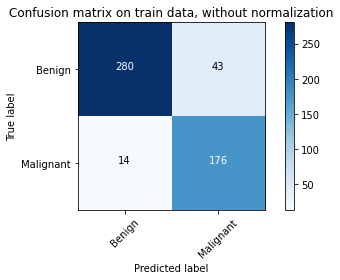

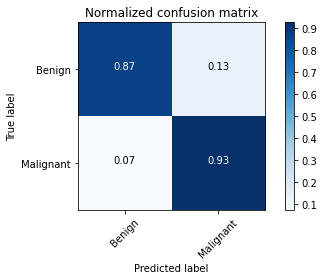

In [43]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_train, y_train_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      title='Confusion matrix on train data, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,  normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Confusion matrix, without normalization
[[17  1]
 [ 0 11]]
Normalized confusion matrix
[[0.94 0.06]
 [0.   1.  ]]


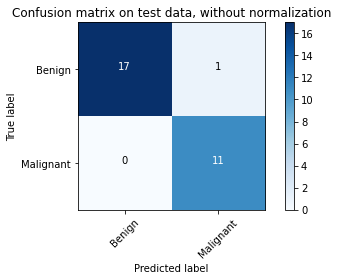

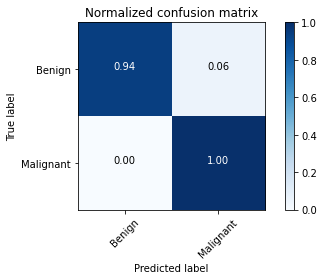

In [44]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      title='Confusion matrix on test data, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,  normalize=True,
                      title='Normalized confusion matrix')

plt.show()

#### **From the confusion matrix of Training Data, we can see that SVM model has classified 299 record correct for Benign out of 323 and 170 record correct for Malignant out of 190.**

**At Test Time SVM Model has classified 17 record correct for Benign out of 18 and 11 record correct for Malignant out of 11.**

## **But overall performance of model is less as compare to Logistic Regression, So we can skip this model for further prediction.**

Most Important Feature for SVM : 


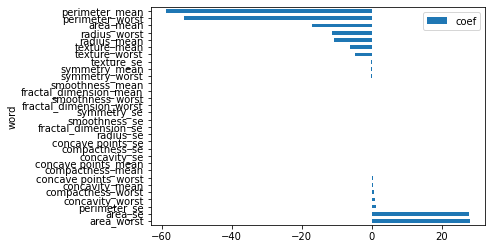

In [45]:
print("Most Important Feature for SVM : ")
df = most_informative_feature_for_class(X,clf)
ax = df.plot.barh(x='word', y='coef')

In [46]:
clf.coef_

array([[-1.09e+01, -6.36e+00, -5.88e+01, -1.70e+01, -6.67e-02,  1.80e-01,
         3.94e-01,  1.56e-01, -1.21e-01, -6.49e-02,  3.98e-03, -3.09e-01,
         1.34e+00,  2.77e+01, -4.05e-04,  4.28e-02,  7.45e-02,  1.67e-02,
        -6.00e-03,  2.16e-03, -1.14e+01, -4.78e+00, -5.37e+01,  2.81e+01,
        -6.15e-02,  6.59e-01,  1.01e+00,  2.52e-01, -9.02e-02, -2.04e-02]])

#### **REMOVING ALL FEATURES WHICH ARE HAVING ZERO AS WEIGHT VALUE**

In [47]:
drop_list = ['fractal_dimension_worst', 'symmetry_se', 'concavity_se', 'compactness_se', 'smoothness_se', 'concave points_se', 'fractal_dimension_se', 'compactness_mean', 'concave points_mean', 'concave points_worst']
x_new_2 = X.drop(drop_list,axis = 1 )        # do not modify x, we will use it later 
x_new_2.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.3001,0.2419,0.07871,1.0950,0.9053,8.589,153.40,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.4601
1,20.57,17.77,132.90,1326.0,0.08474,0.0869,0.1812,0.05667,0.5435,0.7339,3.398,74.08,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.2750
2,19.69,21.25,130.00,1203.0,0.10960,0.1974,0.2069,0.05999,0.7456,0.7869,4.585,94.03,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.3613
3,11.42,20.38,77.58,386.1,0.14250,0.2414,0.2597,0.09744,0.4956,1.1560,3.445,27.23,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.6638
4,20.29,14.34,135.10,1297.0,0.10030,0.1980,0.1809,0.05883,0.7572,0.7813,5.438,94.44,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.2364


In [48]:
from sklearn.model_selection import train_test_split
X_t_new_2, X_test_new_2, Y_t_new_2, Y_test_new_2 = train_test_split(x_new_2, Y_class, test_size=0.05, random_state=42)
X_train_new_2, X_val_new_2, Y_train_new_2, Y_val_new_2 = train_test_split(X_t_new_2, Y_t_new_2, test_size=0.05, random_state=42)

In [49]:
X_train_new_2.shape, Y_train_new_2.shape, X_val_new_2.shape, Y_val_new_2.shape

((513, 20), (513,), (27, 20), (27,))

#### Learning Curve

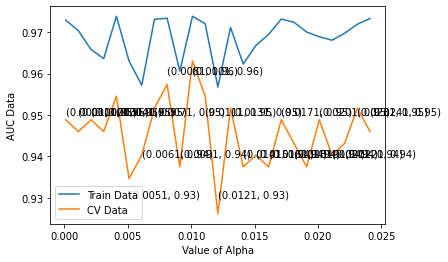

,Train_Accuracy,CV_Accuracy
0.0001,0.972943,0.948864
0.0011,0.970360,0.946023
0.0021,0.965822,0.948864
0.0031,0.963630,0.946023
0.0041,0.973855,0.954545
0.0051,0.963028,0.934659
0.0061,0.957227,0.940341
0.0071,0.973114,0.951705
0.0081,0.973383,0.957386
0.0091,0.960600,0.937500


In [50]:
# Applying logistic regression on each value of C to find best C.
AUC_svm_curve(X_train_new_2, Y_train_new_2, X_val_new_2, Y_val_new_2)

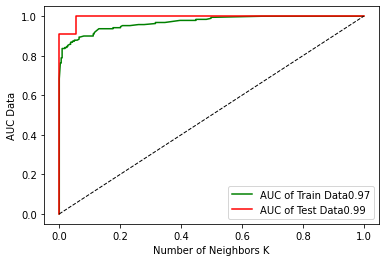

In [51]:
# For the value of C at 0.01 data is not much overfit and underfit, so we are taking that as a C value for our LR model
clf, y_pred, y_train_pred = final_Model(0.0201,X_train_new_2, Y_train_new_2, X_test_new_2, Y_test_new_2)

Confusion matrix, without normalization
[[219 104]
 [  5 185]]
Normalized confusion matrix
[[0.68 0.32]
 [0.03 0.97]]


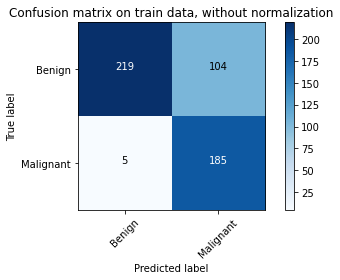

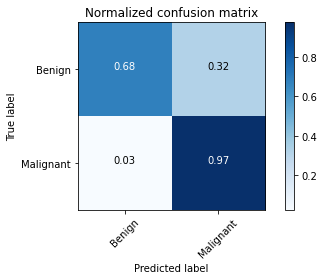

In [52]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_train_new_2, y_train_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      title='Confusion matrix on train data, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,  normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Confusion matrix, without normalization
[[15  3]
 [ 0 11]]
Normalized confusion matrix
[[0.83 0.17]
 [0.   1.  ]]


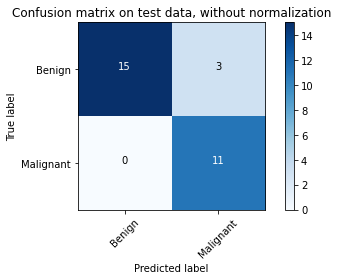

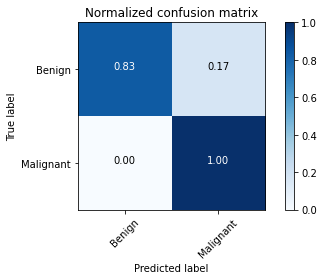

In [53]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test_new_2, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      title='Confusion matrix on test data, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,  normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Most Important Feature for class Logistic Regression : 


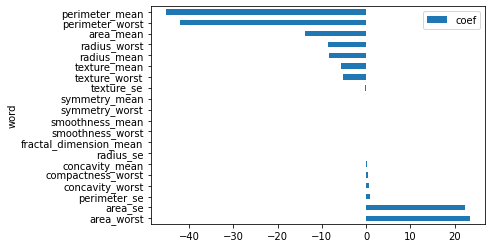

In [54]:
print("Most Important Feature for class Logistic Regression : ")
df = most_informative_feature_for_class(x_new_2,clf)
ax = df.plot.barh(x='word', y='coef')

In [55]:
clf.coef_

array([[-8.33e+00, -5.61e+00, -4.53e+01, -1.38e+01, -5.42e-02,  2.77e-01,
        -9.86e-02, -5.10e-02,  1.05e-02, -3.51e-01,  9.76e-01,  2.24e+01,
        -8.73e+00, -5.24e+00, -4.20e+01,  2.35e+01, -5.34e-02,  4.46e-01,
         6.94e-01, -8.93e-02]])

#### **After removing the unimportant feature :**
**confusion matrix of Training Data, we can see that SVM model has classified 288 record correct for Benign out of 323 and 172 record correct for Malignant out of 190.**

**At Test Time SVM Model has classified 17 record correct for Benign out of 18 and 11 record correct for Malignant out of 11.**

#### **But overall performance of model is less as compare to Logistic Regression, So we can skip this model for further prediction.**

### Random Forest

This is an esembled model, which creates multiple decision tress to solve the classification and regression problem.

if problem is classification, then on that basis of majority of output of all the decision trees for the particular class, it will classify the record.

if problem is regression then it uses average of all the output of decision trees and give the result.

In [56]:
#  These are hyperparameter for Random Forest Algoritham.

max_depth = [1,5,10,50,500,1000]  # Max depth that we want for a particular tree.
n_estimators = [5,10,100,500]  # specify no of trees for the model.

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [58]:
# Function is used to train the random Model
def AUC_curve_rf(X_train,Y_train,X_val, Y_val,max_depth,n_estimators):
    AUC_Train = np.zeros((len(max_depth), len(n_estimators)))
    AUC_CV = np.zeros((len(max_depth), len(n_estimators)))
    for depth in range(len(max_depth)):
        for estimators in range(len(n_estimators)):
    #     Applying Logistic Regression with l1 regularization on trainng data for each C
            clf = RandomForestClassifier(max_depth=max_depth[depth], n_estimators=n_estimators[estimators])
            clf.fit(X_train, Y_train)
                # predict the response
            probs_train = clf.predict_proba(X_train)
            preds_train = probs_train[:,1]
            fpr_train, tpr_train, threshold_train = metrics.roc_curve(Y_train, preds_train)
#             auc_train.append(metrics.auc(fpr_train, tpr_train))
    #     predicting probabilistic value from the cross validation data.
            probs_cv = clf.predict_proba(X_val)
            preds_cv = probs_cv[:,1]
            fpr_cv, tpr_cv, threshold_cv = metrics.roc_curve(Y_val, preds_cv)
#             auc_cv.append(metrics.auc(fpr_cv, tpr_cv)) 
#             print("Depth ",max_depth[depth],"Split ",min_samples_split[split], "AUC_train ",metrics.auc(fpr_train, tpr_train),
#                  "AUC_cv ",metrics.auc(fpr_cv, tpr_cv))
            
            AUC_Train[depth][estimators] = metrics.auc(fpr_train, tpr_train)
            AUC_CV[depth][estimators] = metrics.auc(fpr_cv, tpr_cv)
    return AUC_Train, AUC_CV

In [59]:
def plot_graph(AUC_train, AUC_cv):
    df_train = pd.DataFrame(AUC_train, columns = n_estimators,index = max_depth)
    df_cv = pd.DataFrame(AUC_cv, columns = n_estimators,index = max_depth)
    # plt.subplot(2, 1, 1)
    sns.heatmap(df_train, annot=True, fmt="g", cmap='viridis')
    plt.ylabel("Depth")
    plt.xlabel("n_estimators")
    plt.title("AUC values on Train data")
    plt.show()
    # plt.subplot(2, 1, 2)
    sns.heatmap(df_cv, annot=True, fmt="g", cmap='viridis')
    plt.ylabel("Depth")
    plt.xlabel("n_estimators")
    plt.title("AUC values on CV data")
    plt.show()
    # print(df)

In [60]:
def final_Model_rf(X_train,Y_train,X_test,Y_test,max_depth,n_estimators):
    clf = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators)
    clf.fit(X_train, Y_train)
    # getting probabilistic value from my model on Train data
    probs_train = clf.predict_proba(X_train)
    preds_train= probs_train[:,1]
    y_train_pred = clf.predict(X_train)
    fpr_train, tpr_train, threshold_train = metrics.roc_curve(Y_train, preds_train)
    auc_train = metrics.auc(fpr_train, tpr_train)

    # getting probabilistic and predicted value from my model on Train data
    probs_test = clf.predict_proba(X_test)
    y_pred = clf.predict(X_test)
    preds_test = probs_test[:,1]
    fpr_test, tpr_test, threshold_test = metrics.roc_curve(Y_test, preds_test)
    auc_test = metrics.auc(fpr_test, tpr_test)

    # Graph to show Accuracy percentage on train and test set data.
    plt.plot(fpr_train,tpr_train,label="AUC of Train Data"+str(np.round(auc_train,2)), color = 'green')
    plt.plot(fpr_test,tpr_test,label="AUC of Test Data"+str(np.round(auc_test,2)), color = 'red')
    plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
    plt.xlabel('Number of Neighbors K')
    plt.ylabel('AUC Data')
    plt.legend()
    plt.show()
    
    return clf, y_pred, y_train_pred

In [61]:
AUC_train, AUC_cv = AUC_curve_rf(X_train,Y_train,X_val, Y_val,max_depth,n_estimators)

#### Learning Curve

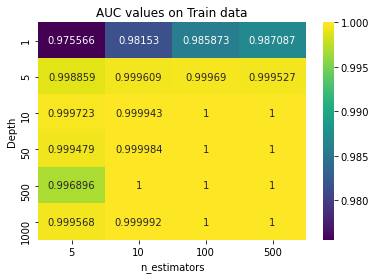

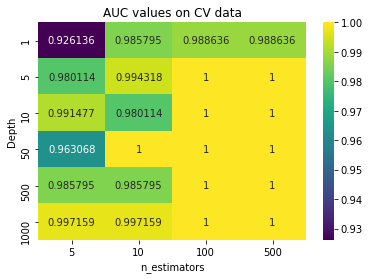

In [62]:
# plotting AUC performance with Depth and n_estimators
plot_graph(AUC_train, AUC_cv)

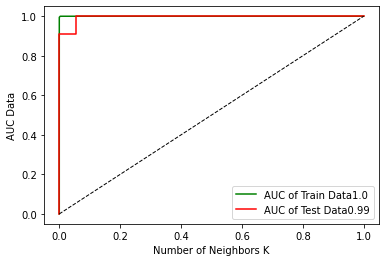

In [63]:
# Training the model on best Depth and n_estimators
clf, y_pred, y_train_pred = final_Model_rf(X_train, Y_train, X_test, Y_test,1000,10)

Confusion matrix, without normalization
[[323   0]
 [  2 188]]
Normalized confusion matrix
[[1.   0.  ]
 [0.01 0.99]]


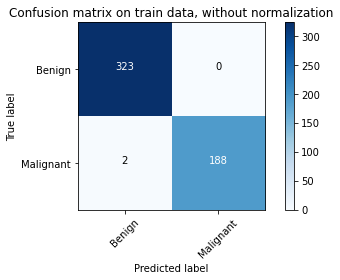

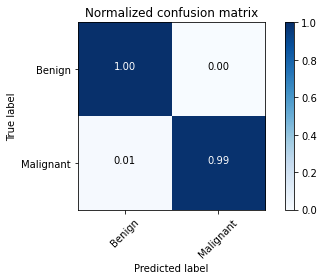

In [64]:
# Compute confusion matrix on train Data
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_train, y_train_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      title='Confusion matrix on train data, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,  normalize=True,
                      title='Normalized confusion matrix')

plt.show()


Confusion matrix, without normalization
[[18  0]
 [ 1 10]]
Normalized confusion matrix
[[1.   0.  ]
 [0.09 0.91]]


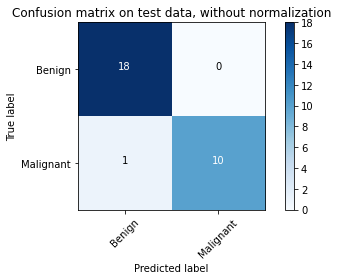

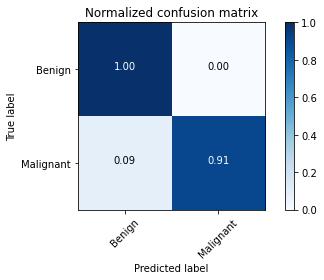

In [65]:
# Compute confusion matrix on train Data
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      title='Confusion matrix on test data, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,  normalize=True,
                      title='Normalized confusion matrix')

plt.show()


**From the confusion matrix of Training Data, we can see that RF model has classified 323 record correct for Benign out of 323 and 188 record correct for Malignant out of 190.**

At Test Time RF Model has classified 17 record correct for Benign out of 18 and 10 record correct for Malignant out of 11.

In [66]:
# most important positive class feature
def most_important_feature_rf(feature_names, classifier):
    weight = classifier.feature_importances_
    topn = sorted(zip(weight, feature_names), key = lambda x: x[0])
    column_names = ["word", "coef"]
    df = pd.DataFrame(columns = column_names)
    row = 0
    for coe, name in topn:
        df.loc[row] = [name, coe]
        row+=1
    return df

In [67]:
clf.feature_importances_

array([0.01, 0.01, 0.12, 0.  , 0.  , 0.04, 0.01, 0.02, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.  , 0.  , 0.01, 0.  , 0.  , 0.01, 0.08, 0.02,
       0.16, 0.21, 0.  , 0.03, 0.02, 0.16, 0.02, 0.01])

Most Important Feature for class Logistic Regression : 


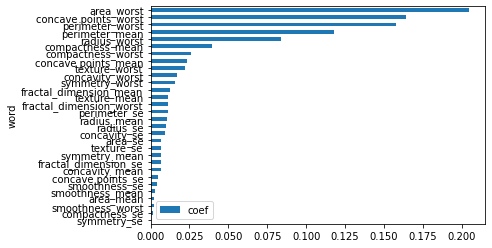

In [68]:
print("Most Important Feature for class Logistic Regression : ")
df = most_important_feature_rf(X.columns,clf)
ax = df.plot.barh(x='word', y='coef')

In [69]:
import pydotplus
from sklearn.tree import export_graphviz
def decision_trees_save(clf, iteration, feature_names, target_names):
    file_name = "cancer_"+str(iteration)+".png"
    dot_data = export_graphviz(clf, out_file = None,feature_names=feature_names, class_names = target_names)
    # print(dot_data)
    graph = pydotplus.graph_from_dot_data(dot_data)
    # print(graph)
    graph.write_png(file_name)

In [70]:
for i in range(len(clf.estimators_)):
    decision_trees_save(clf.estimators_[i], i, X.columns, ['Benign', 'Malignant'])

#### Iterations

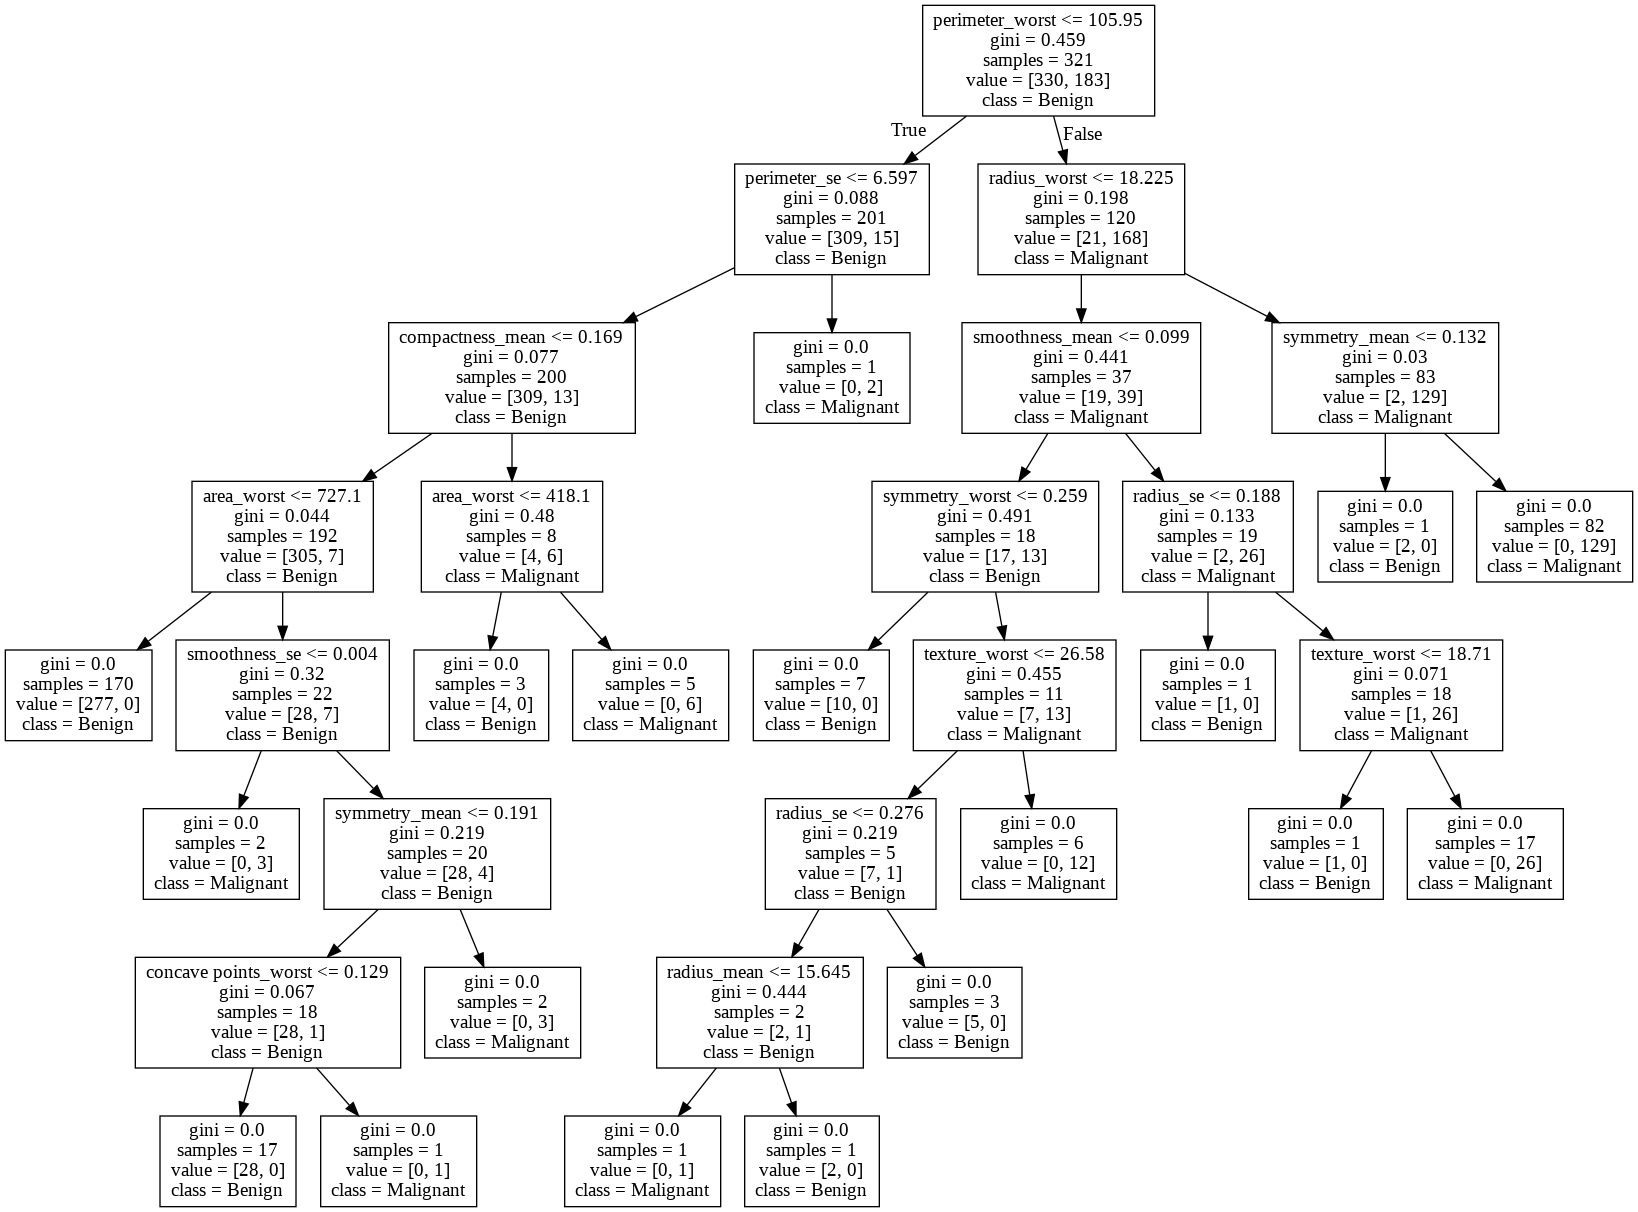

In [71]:
from PIL import Image
image = Image.open("cancer_0.png")
image

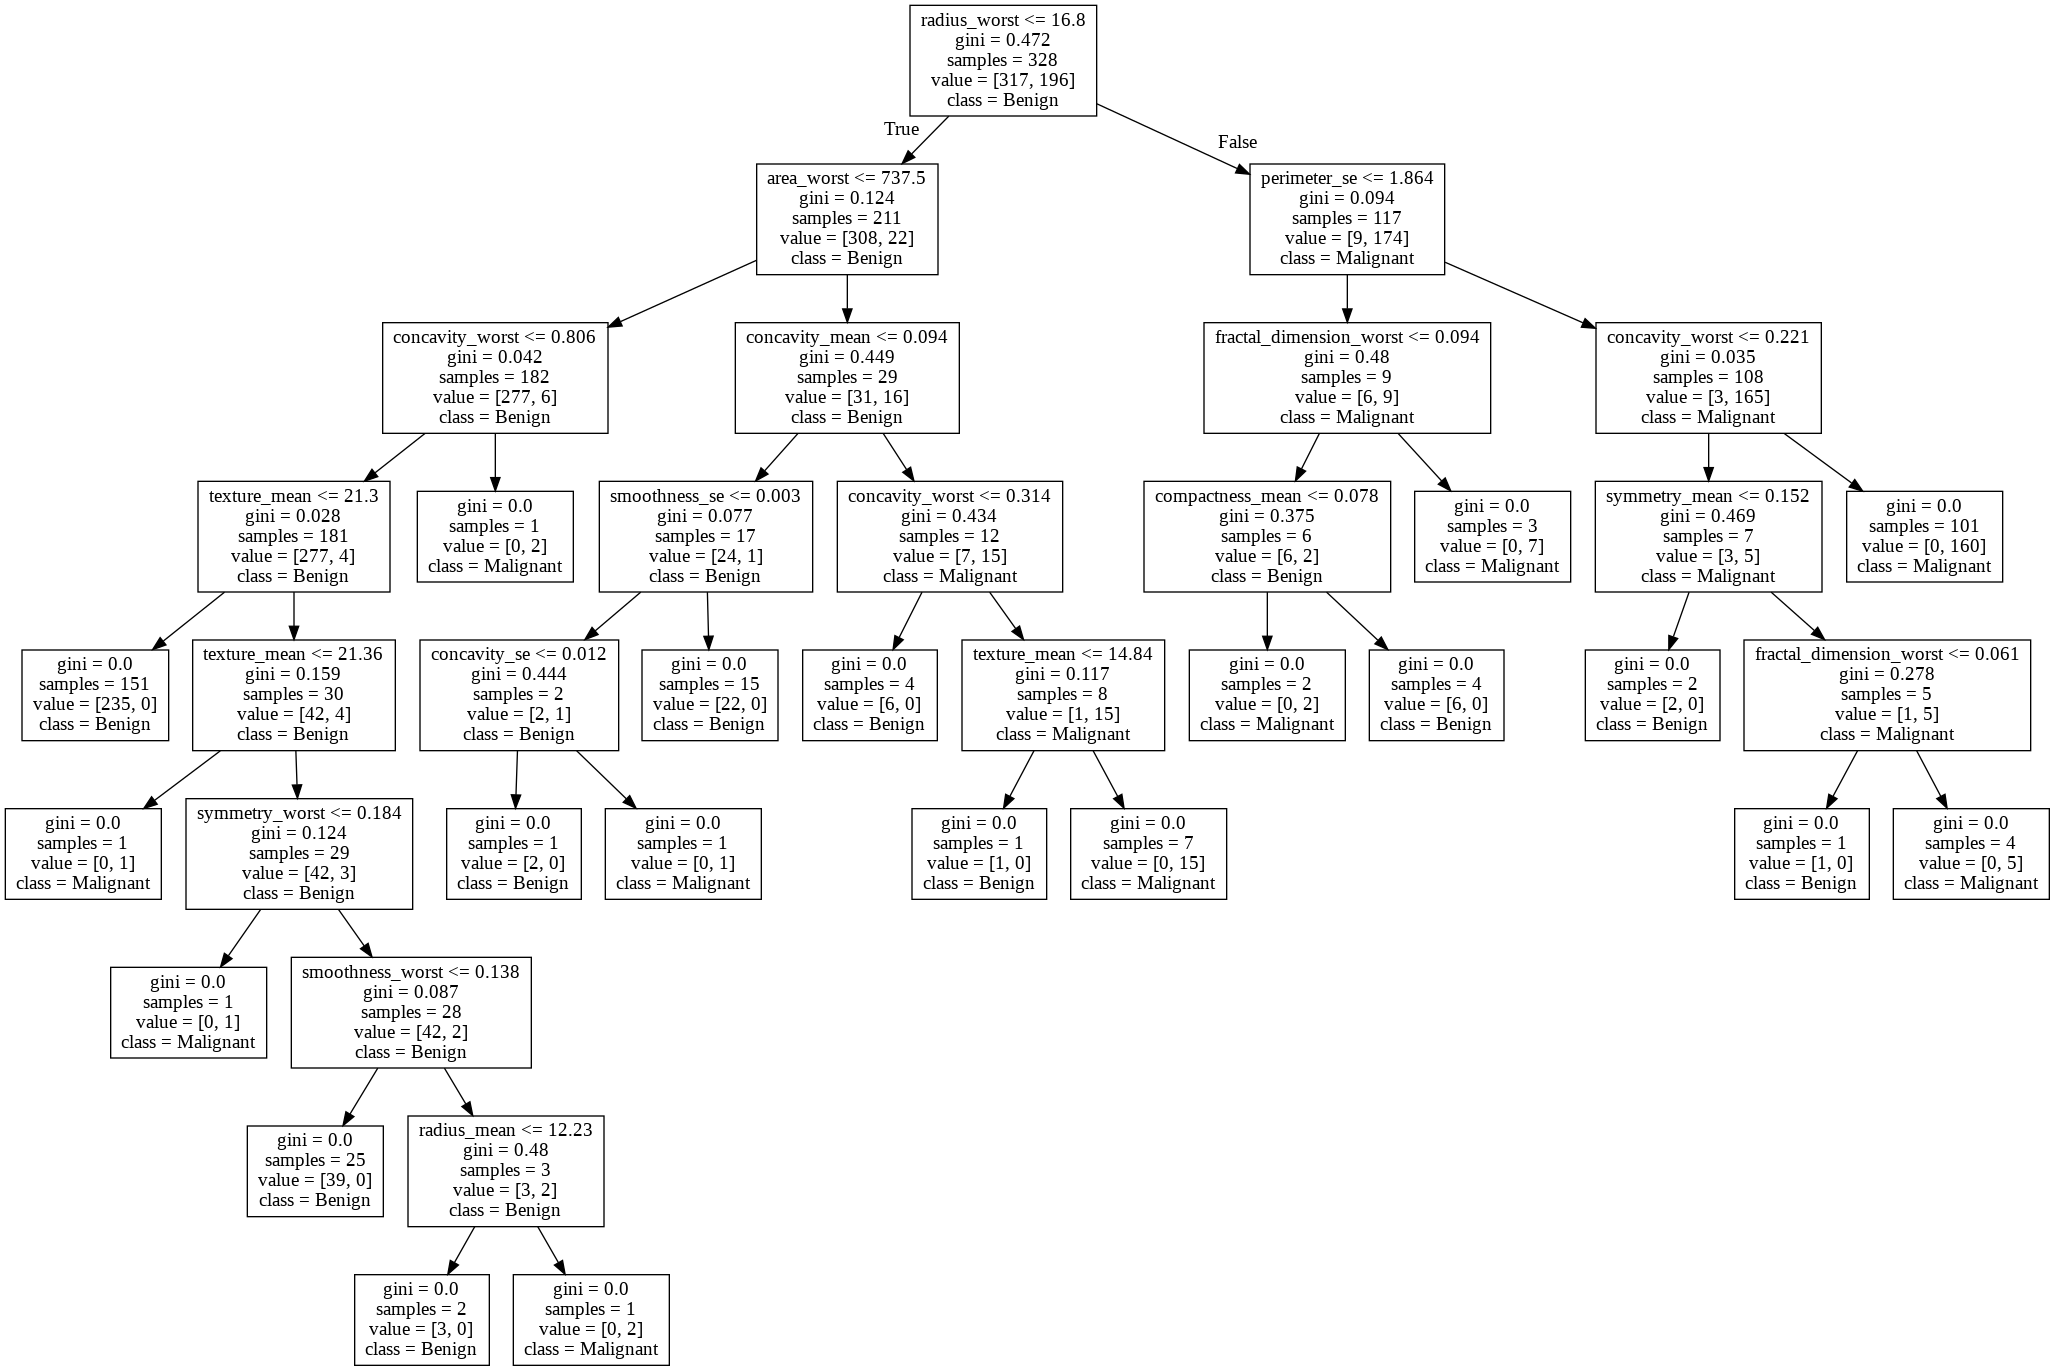

In [72]:
image = Image.open("cancer_1.png")
image

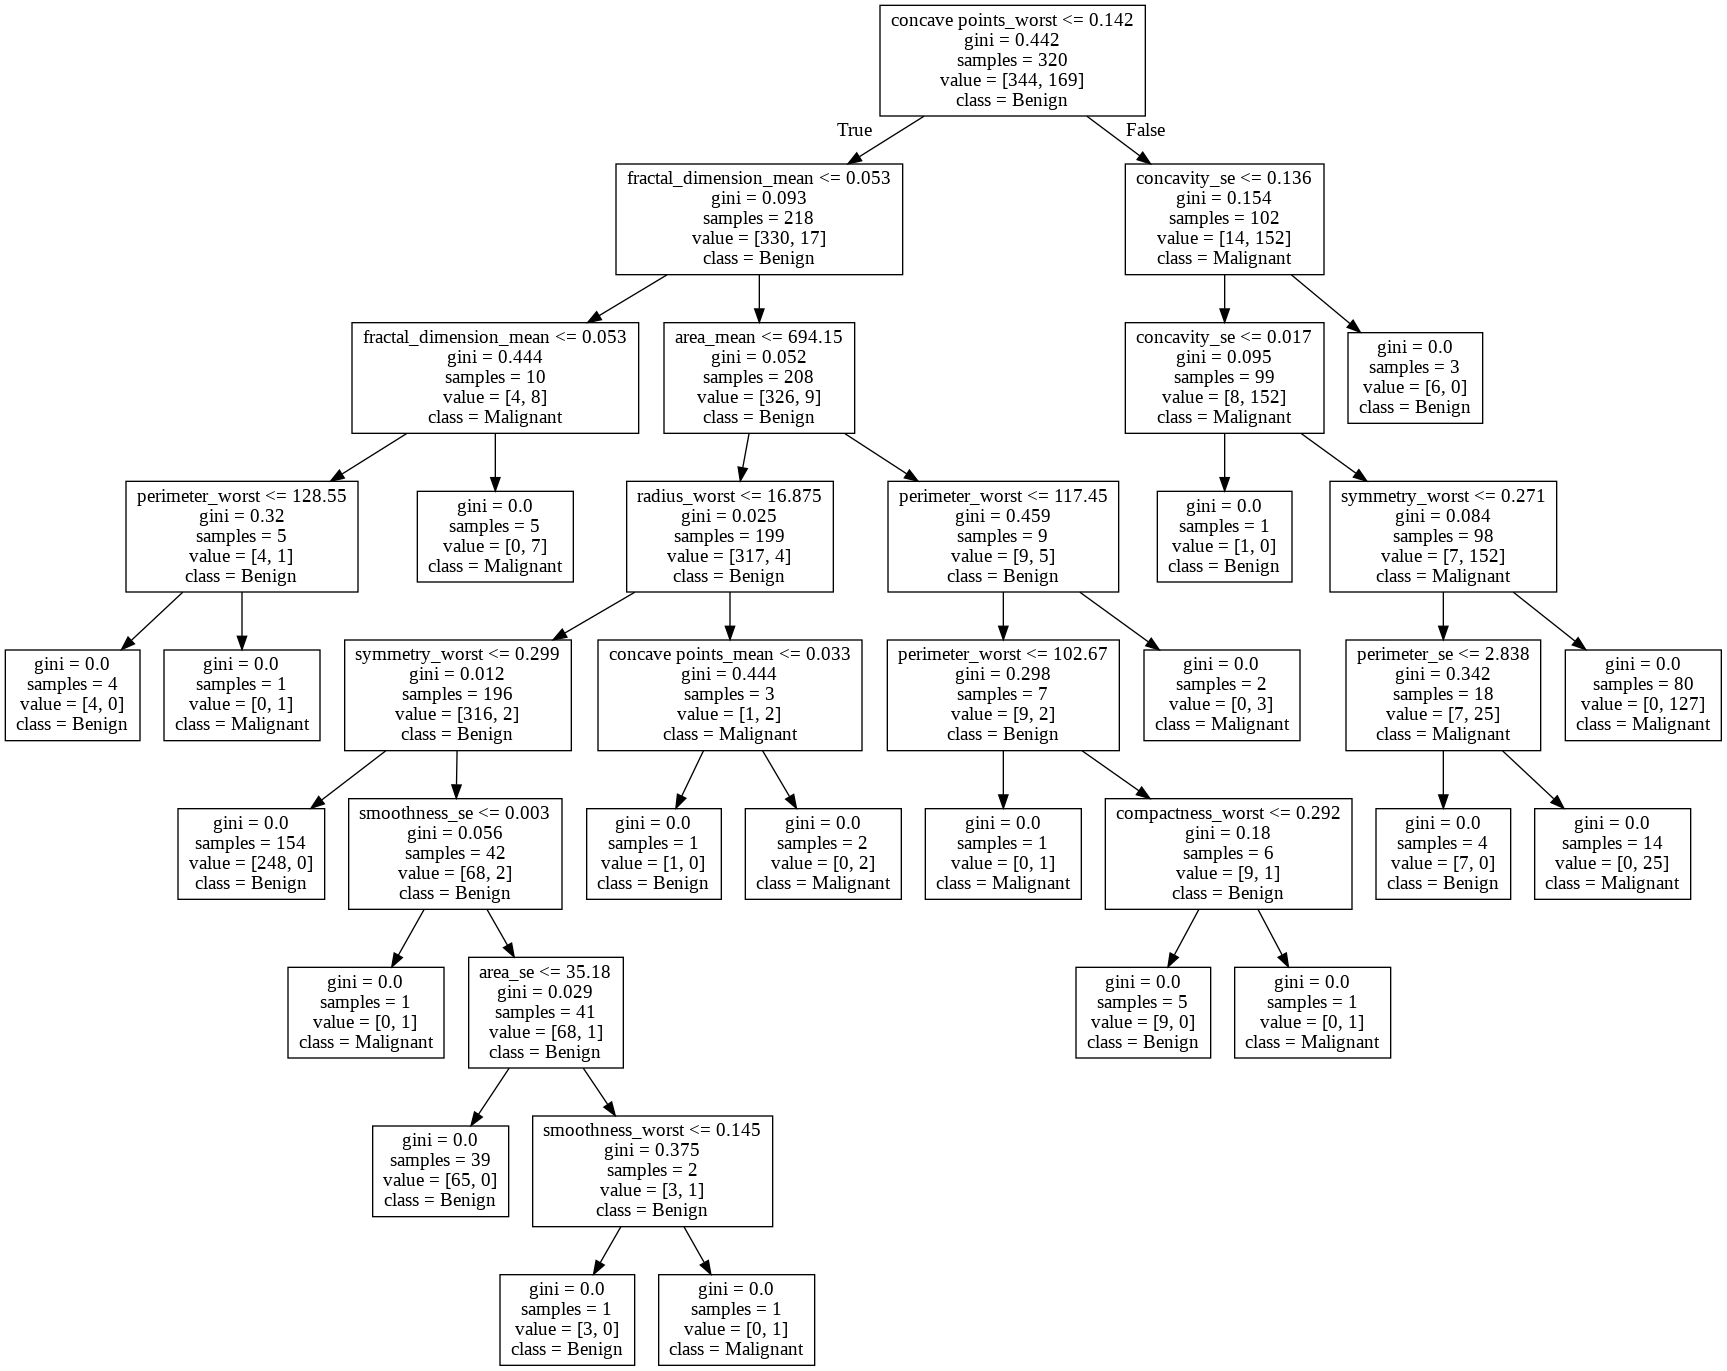

In [73]:
image = Image.open("cancer_2.png")
image

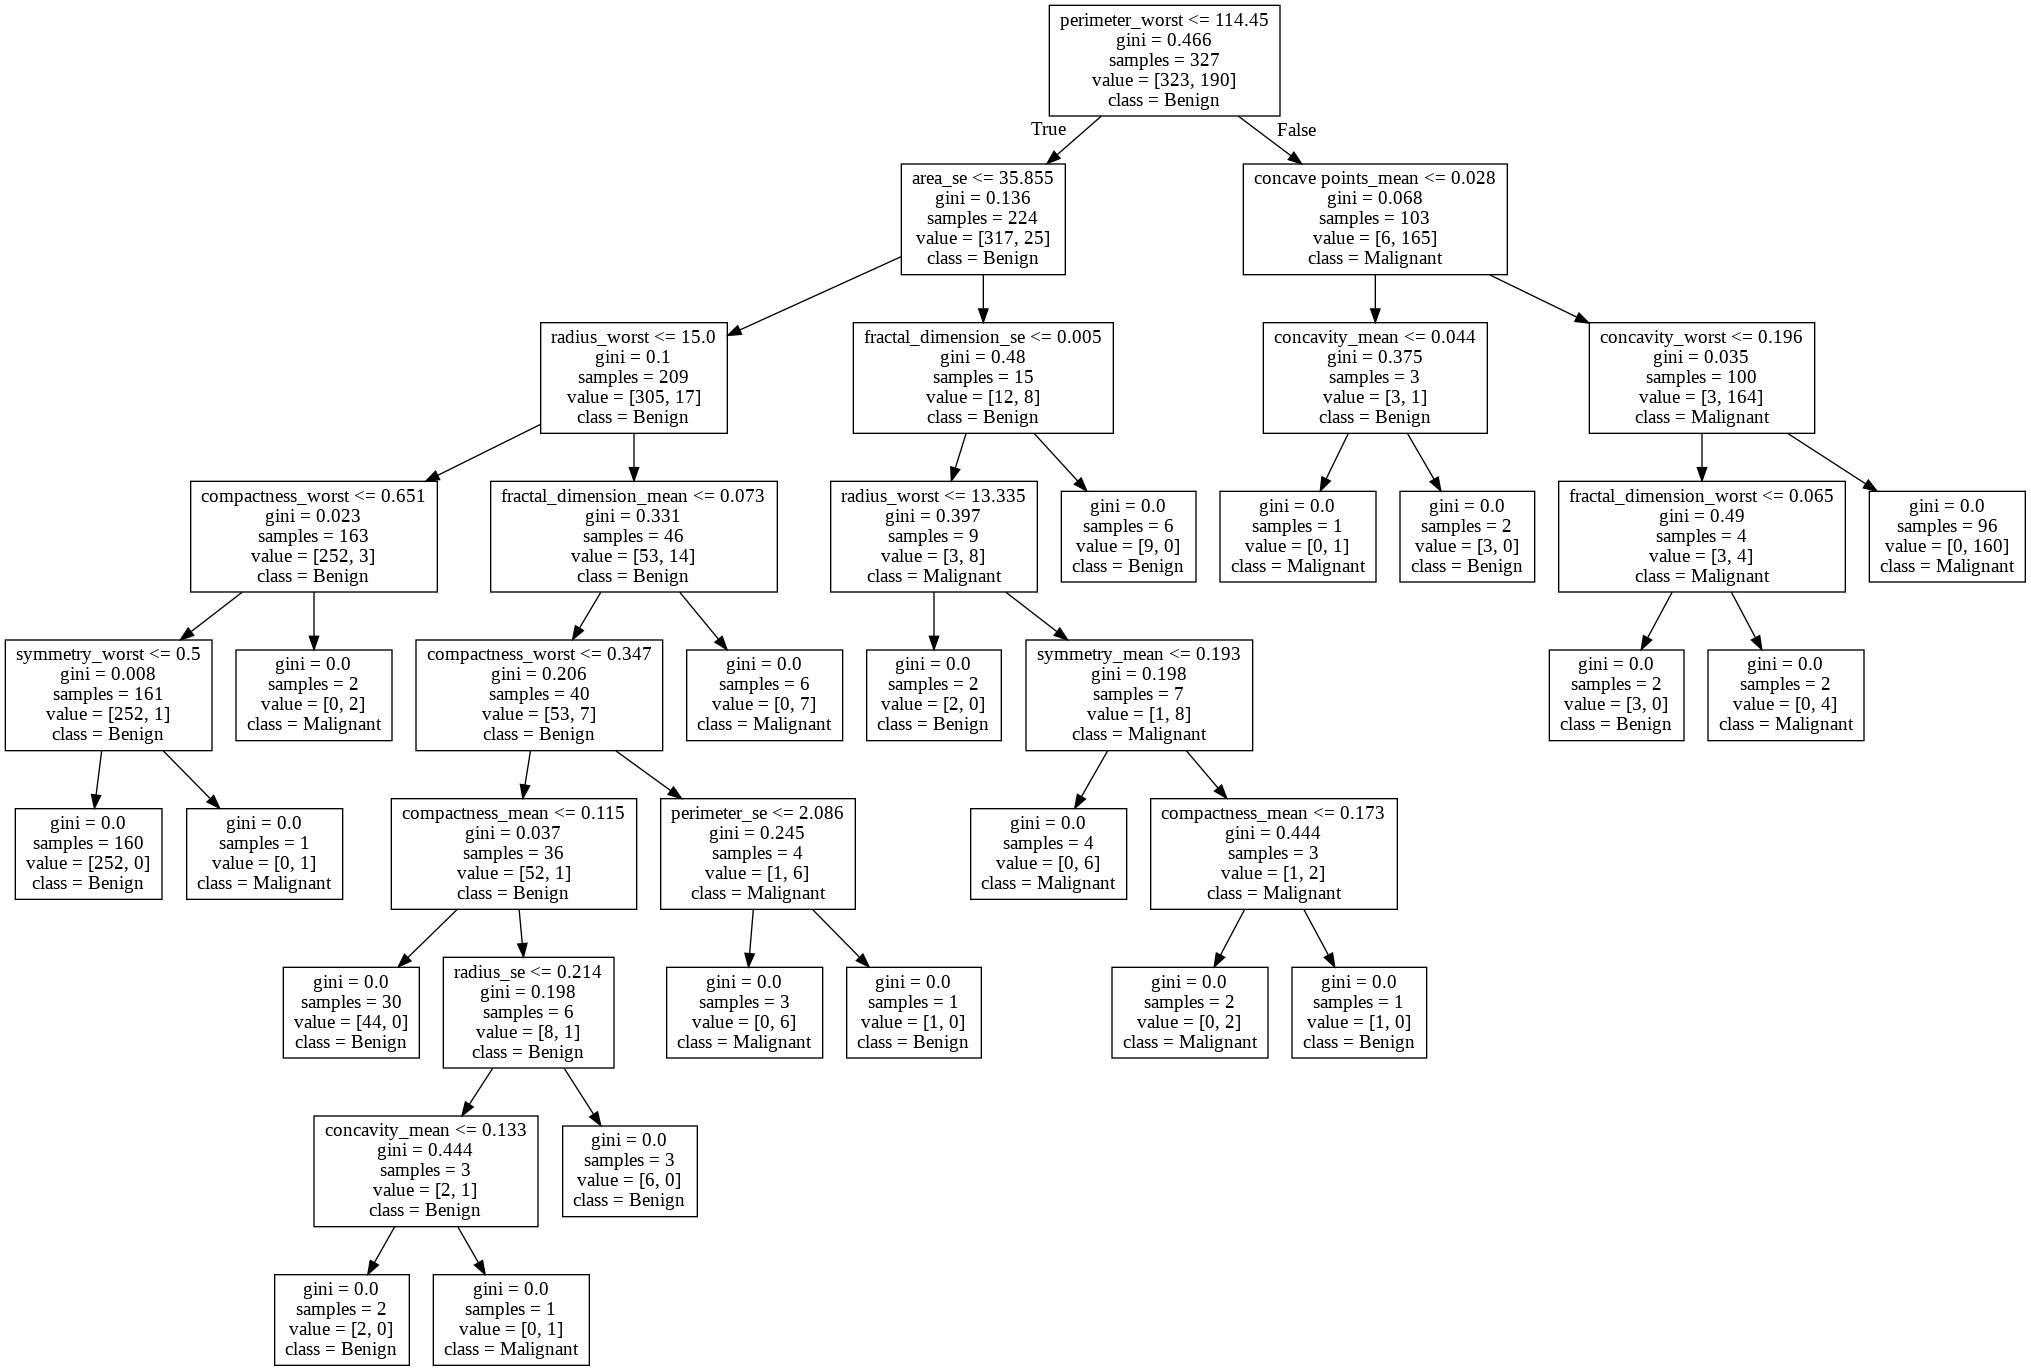

In [74]:
image = Image.open("cancer_3.png")
image

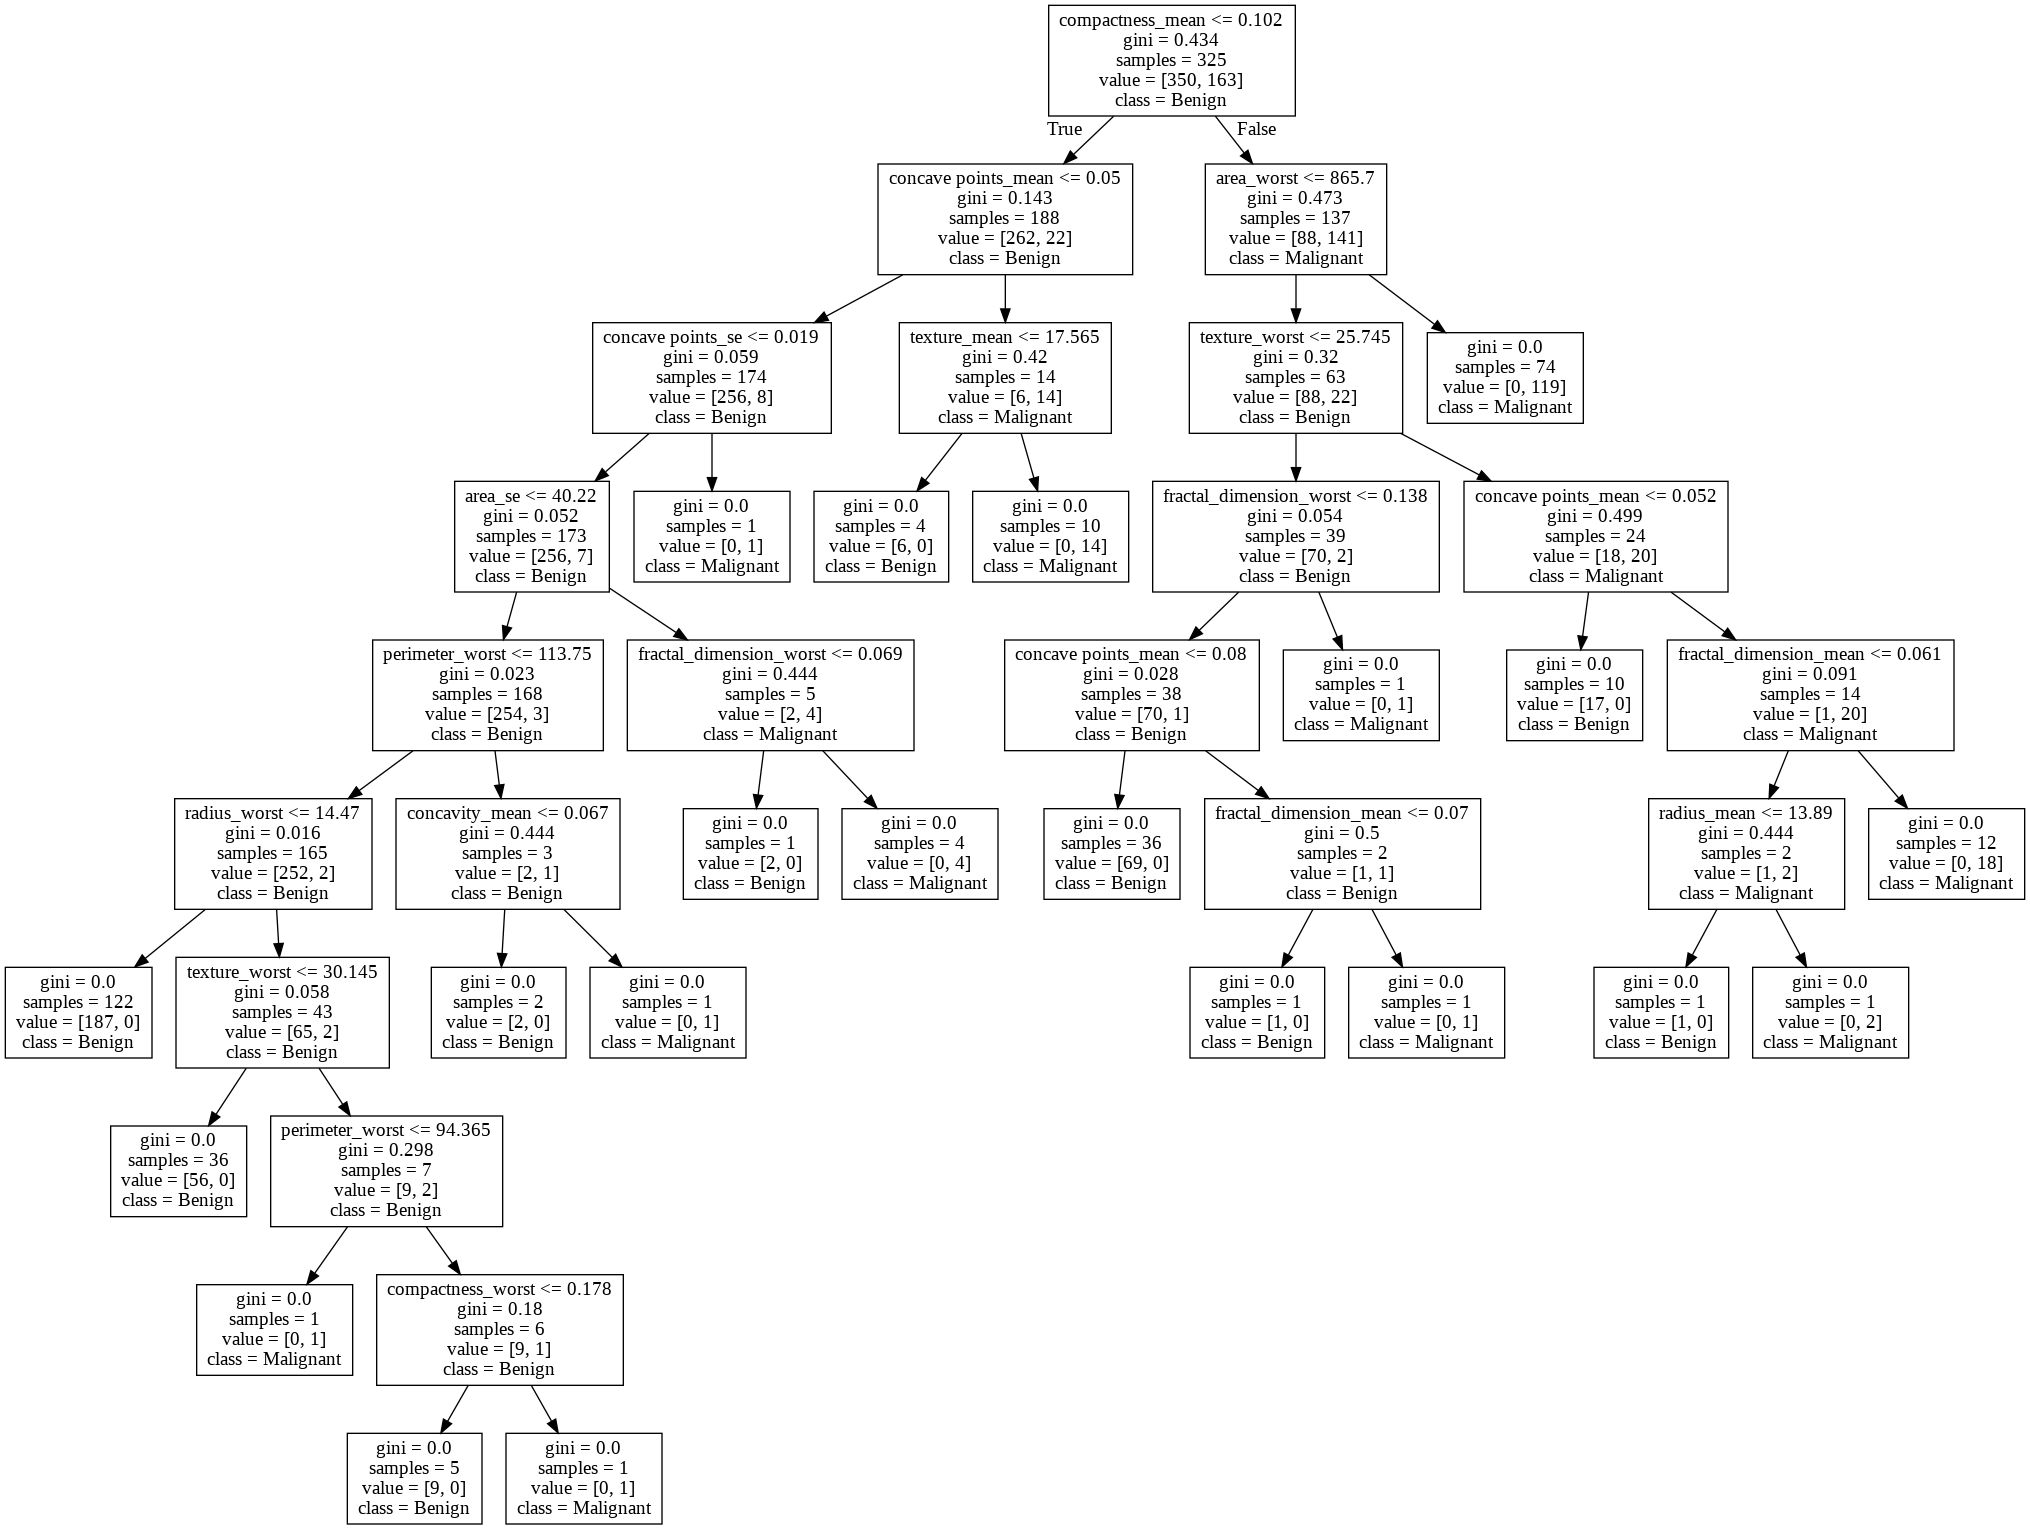

In [75]:
image = Image.open("cancer_4.png")
image

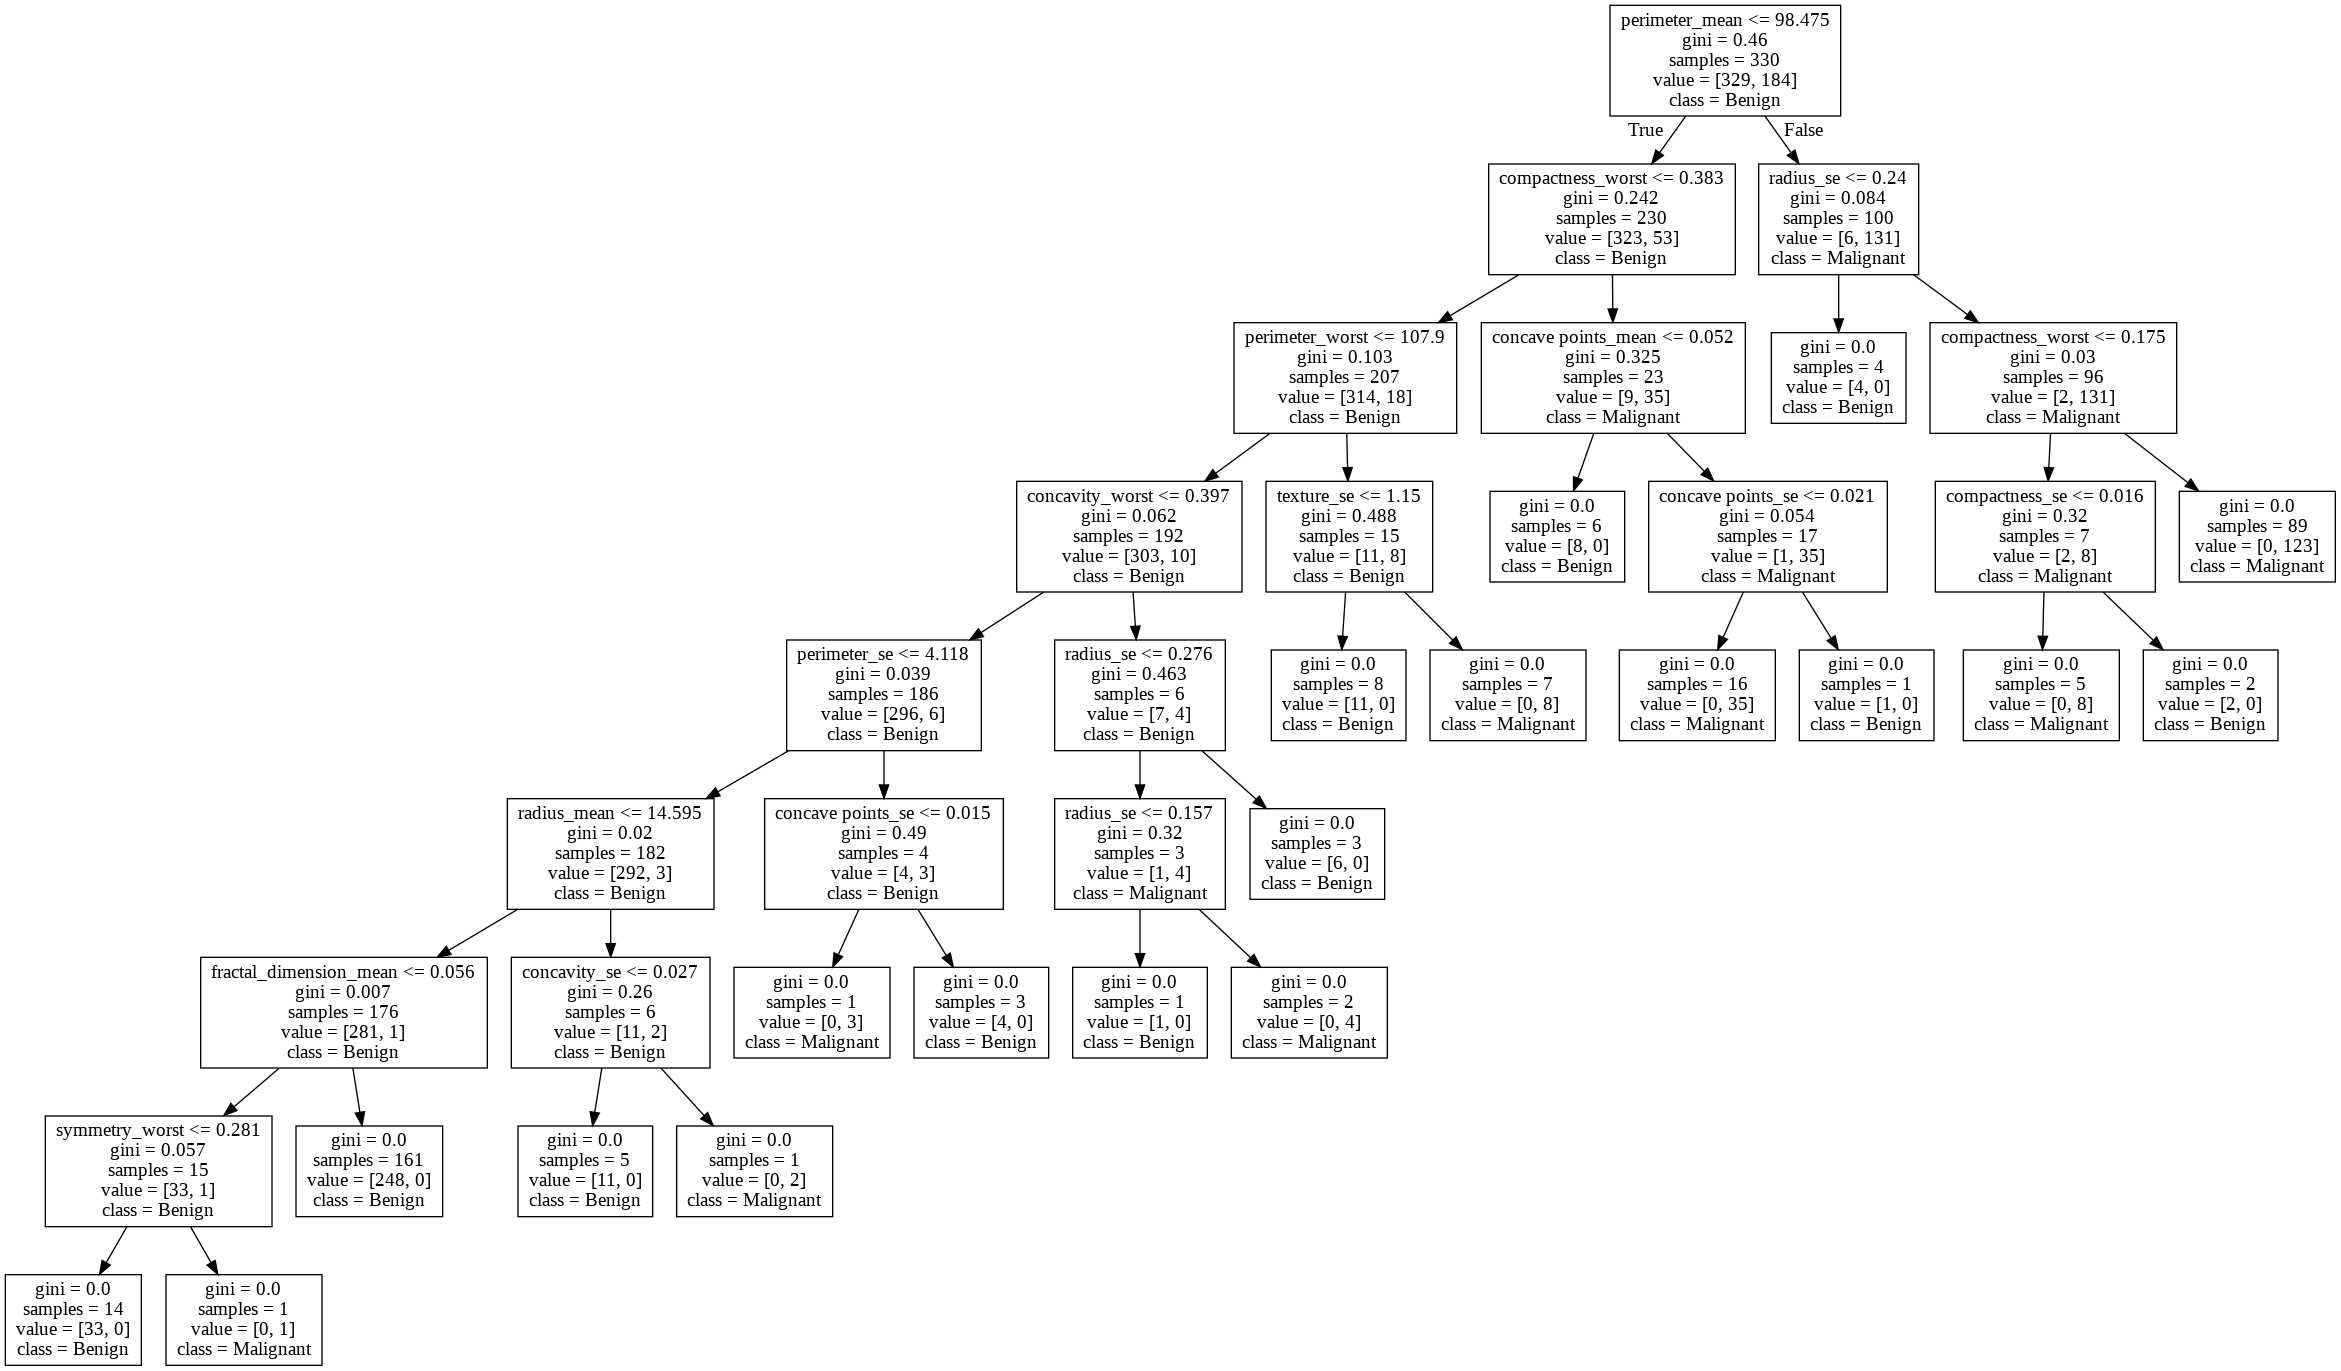

In [76]:
image = Image.open("cancer_5.png")
image

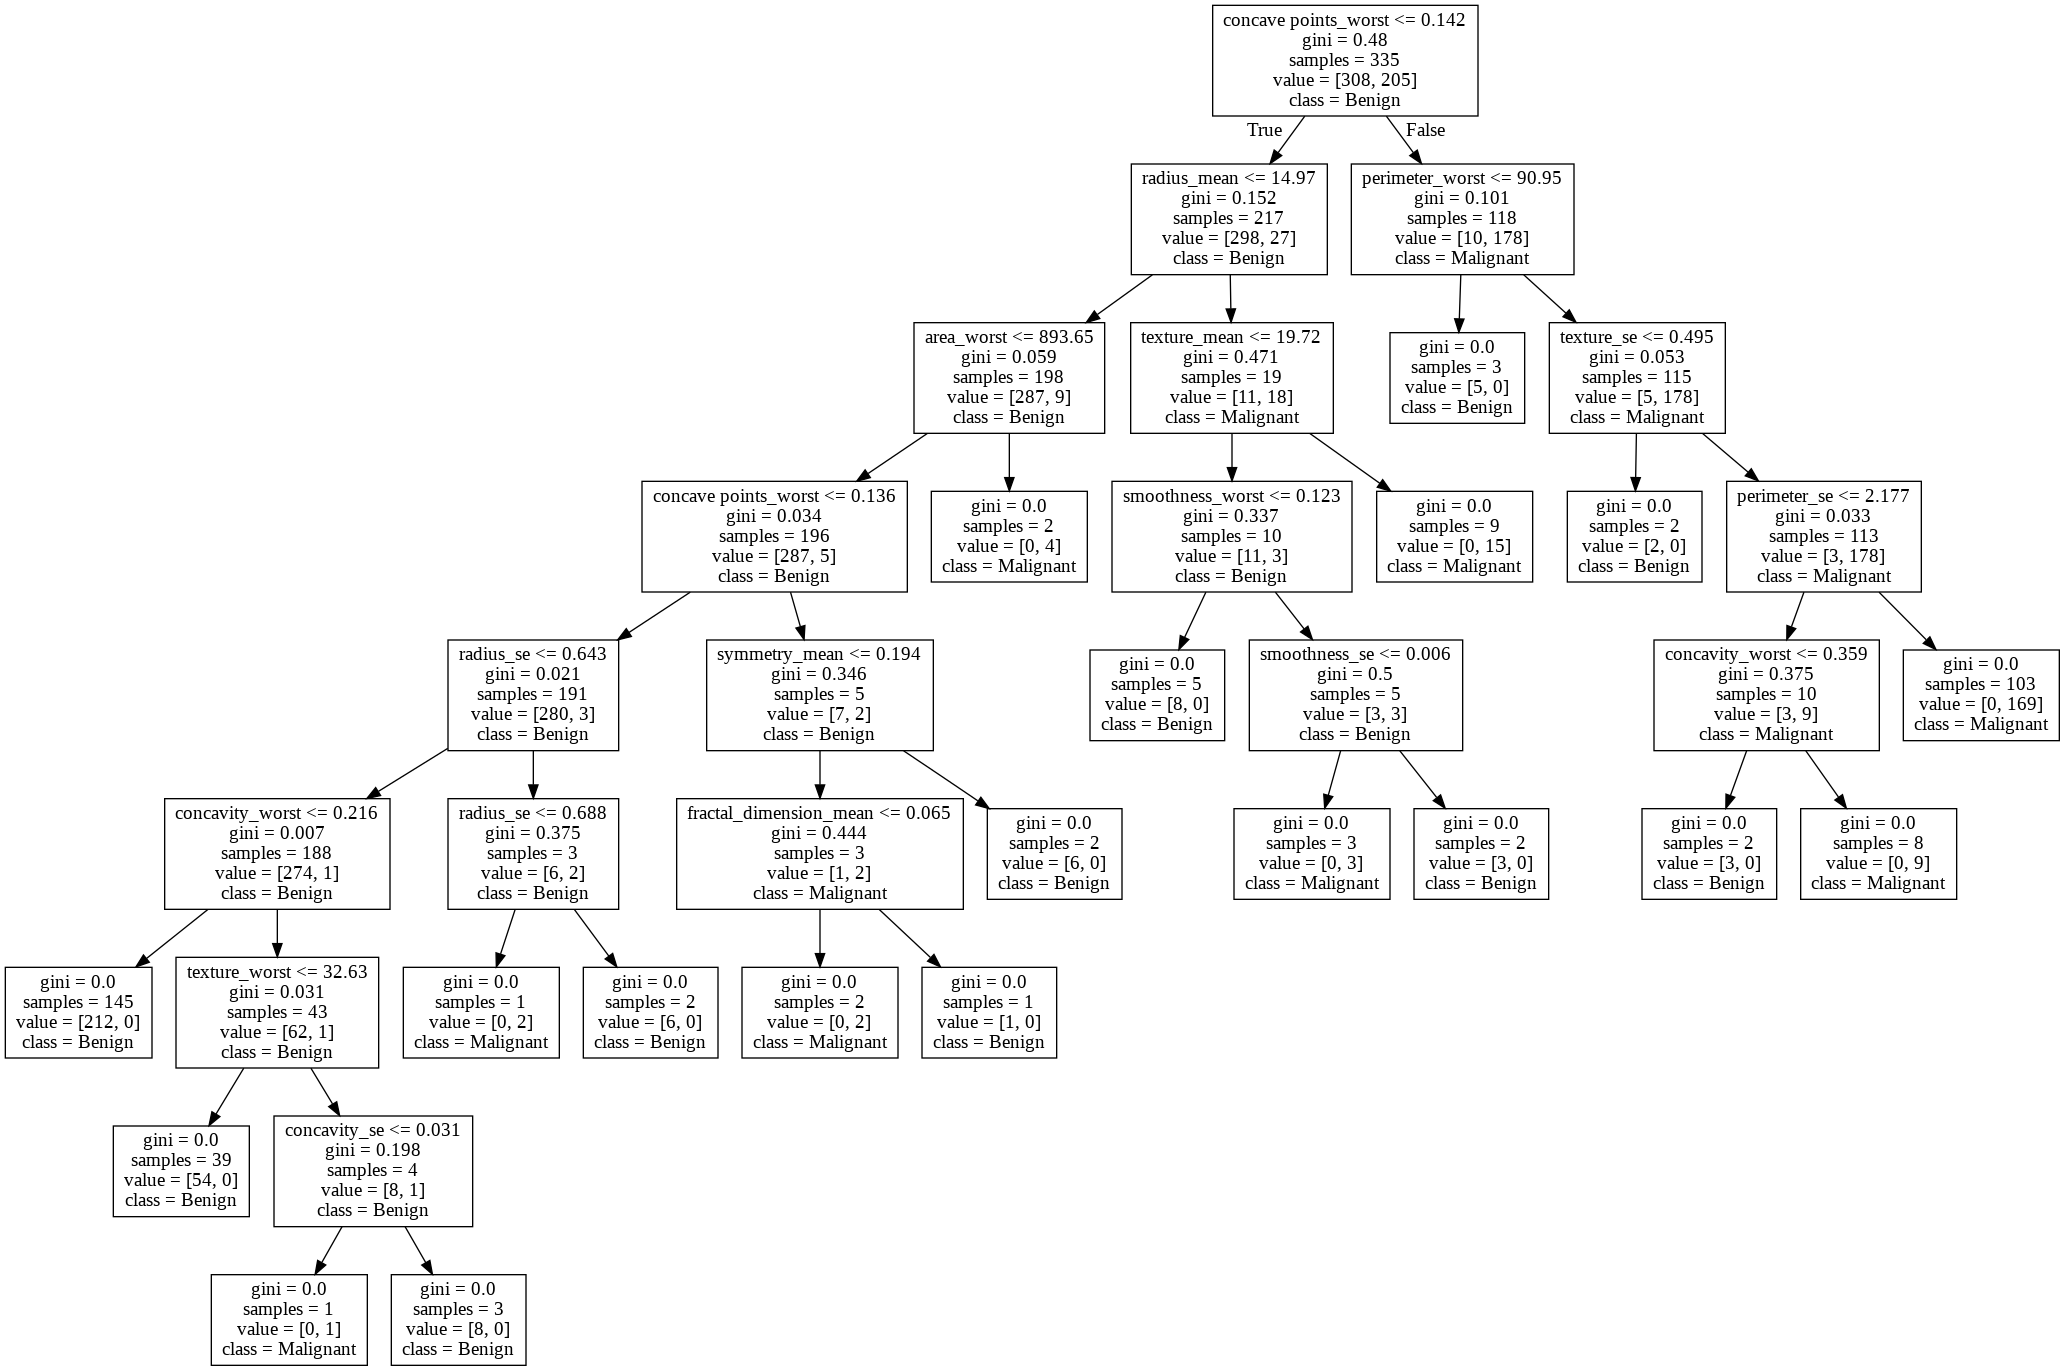

In [77]:
image = Image.open("cancer_6.png")
image

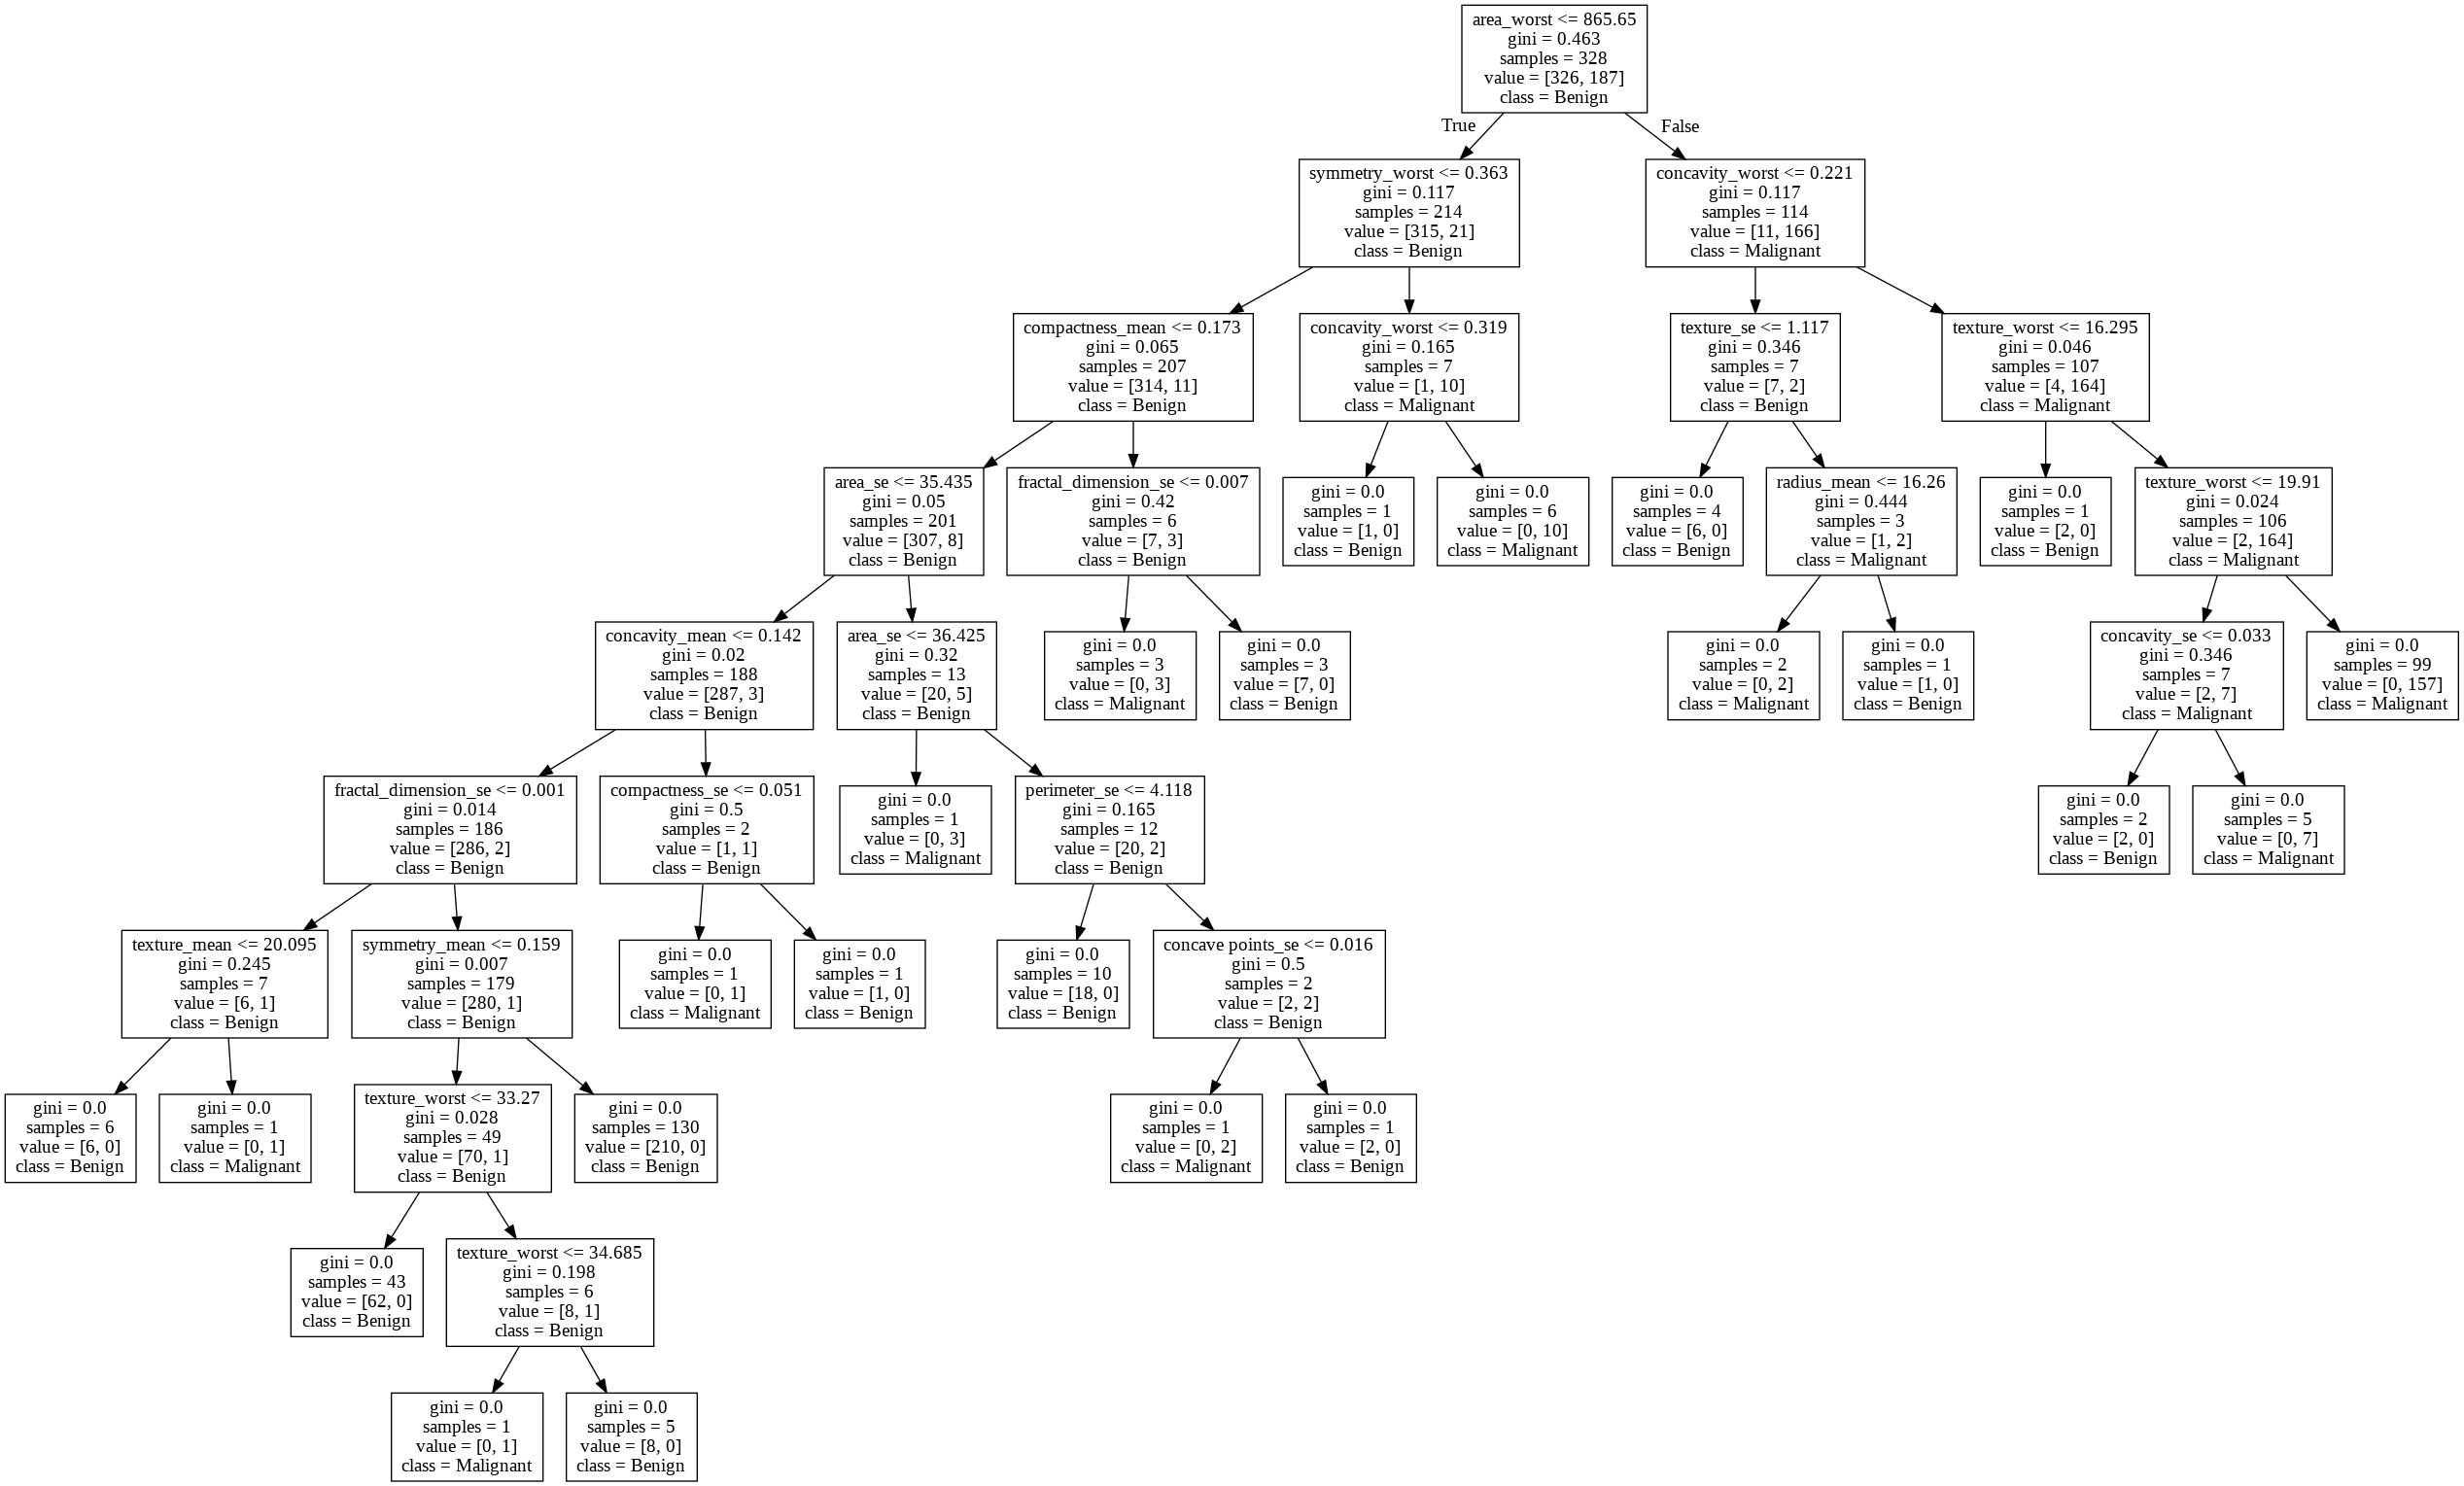

In [78]:
image = Image.open("cancer_7.png")
image

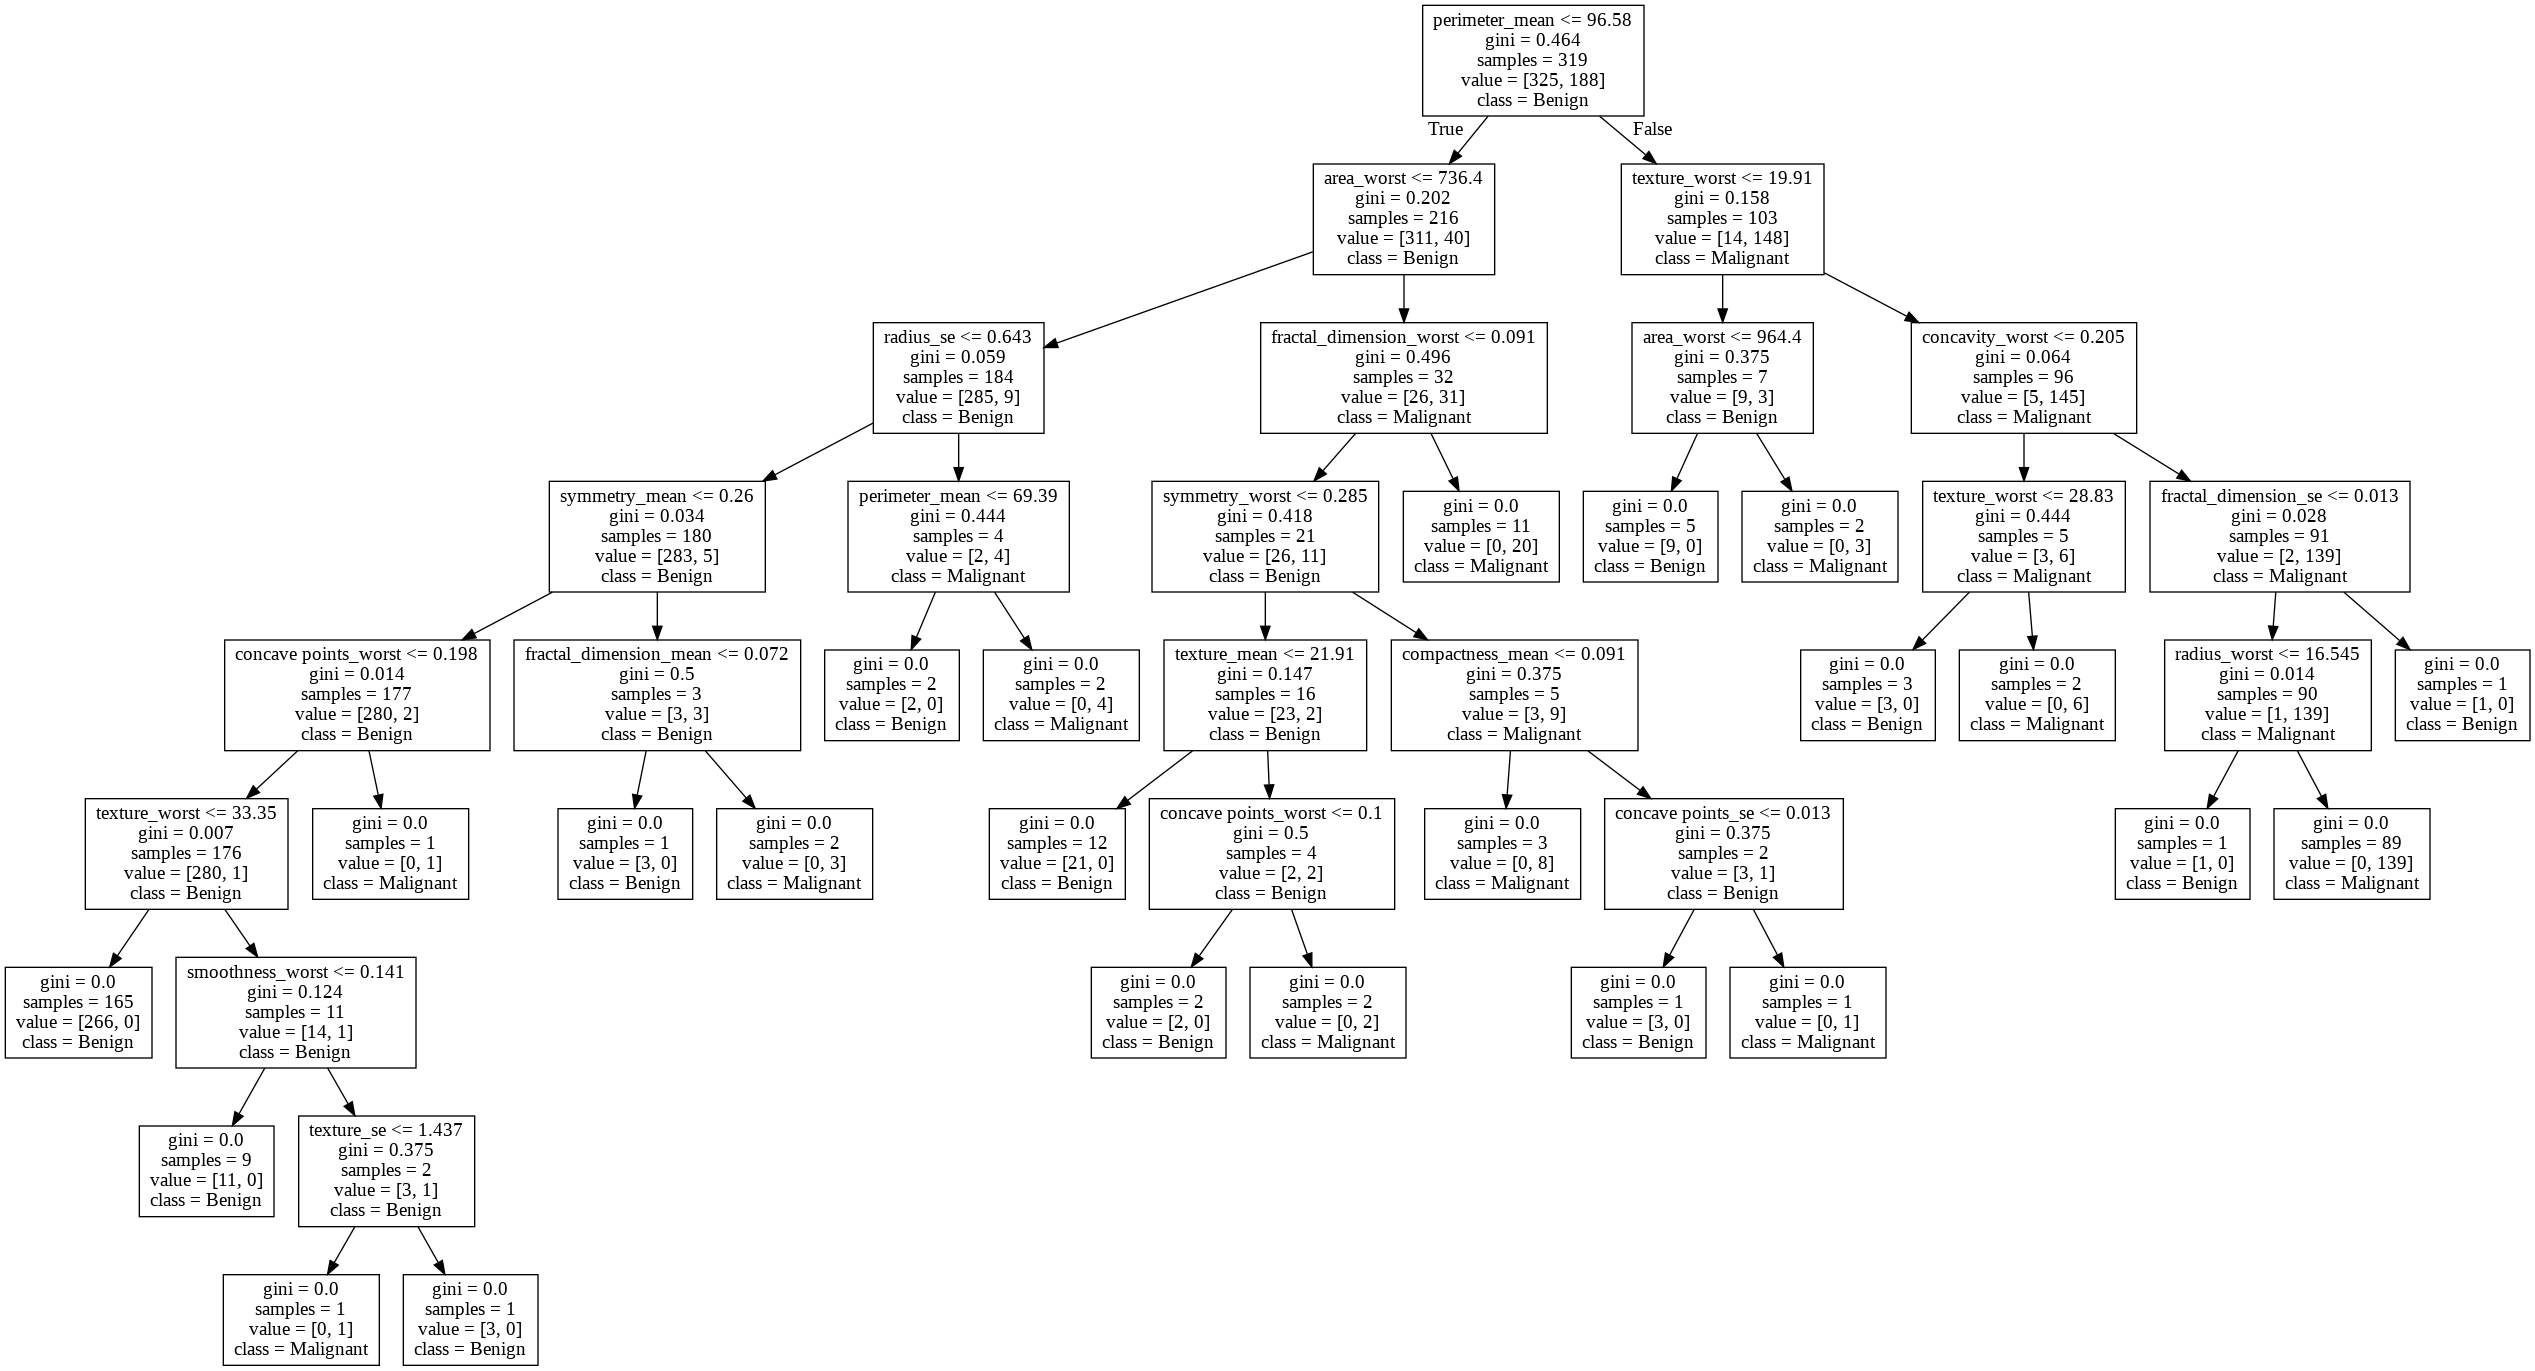

In [79]:
image = Image.open("cancer_8.png")
image

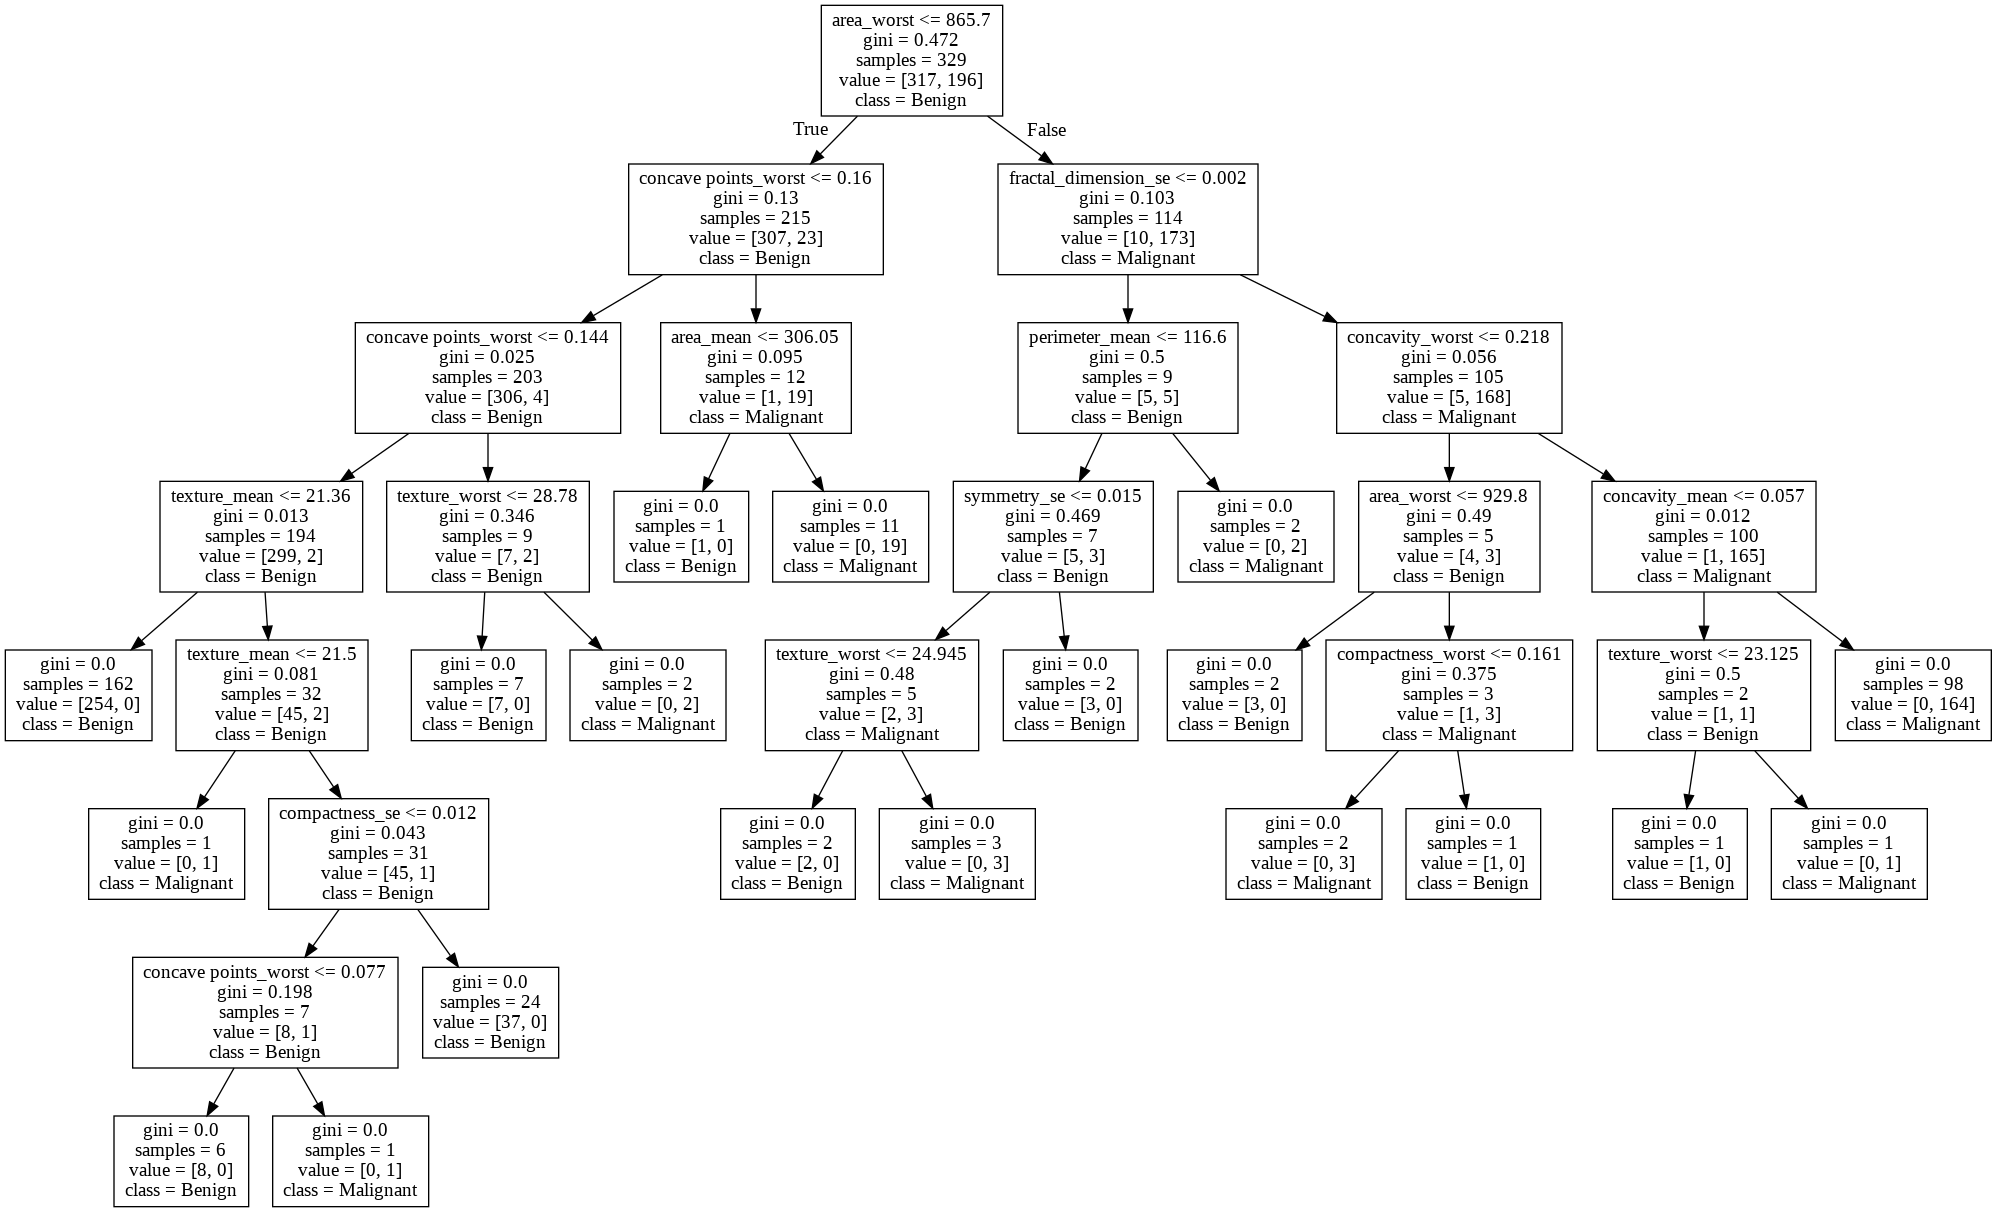

In [80]:
image = Image.open("cancer_9.png")
image

## Conclusion :

In [81]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.title = 'Models Result : '
x.field_names = ["Model", "Train AUC performance", "Test AUC Performance"]

x.add_row(["Logistic Regression", "99 %","99 %"])
x.add_row(["SVM", "91 %","99 %"])
x.add_row(["RandomForestClassfier", "100 %","98 %"])

print(x)

+----------------------------------------------------------------------+
|                           Models Result :                            |
+-----------------------+-----------------------+----------------------+
|         Model         | Train AUC performance | Test AUC Performance |
+-----------------------+-----------------------+----------------------+
|  Logistic Regression  |          99 %         |         99 %         |
|          SVM          |          91 %         |         99 %         |
| RandomForestClassfier |         100 %         |         98 %         |
+-----------------------+-----------------------+----------------------+



## We can see **RandomForestClassfier** Performing good on our train and test data


**So we can take Random Forest Model for further prediction on unseen data.**